In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

color_pal = sns.color_palette()

/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [43]:
#read X data
df_X = pd.read_csv('data/Netherlands/input_data.csv')
#df_X = df_X.set_index('time')
df_X.index = pd.to_datetime(df_X.index)

In [44]:
df_X.head()

time   rr    tg    tn    tx          pp  \
1970-01-01 00:00:00.000000000  1990-01-01  0.0 -1.71 -2.45 -1.64  1020.60004   
1970-01-01 00:00:00.000000001  1990-01-02  0.0 -0.66 -2.29 -0.24  1022.30000   
1970-01-01 00:00:00.000000002  1990-01-03  0.0  0.05 -0.62  0.69  1024.10000   
1970-01-01 00:00:00.000000003  1990-01-04  2.5 -0.29 -1.86  1.44  1021.60004   
1970-01-01 00:00:00.000000004  1990-01-05  0.0  3.21  1.35  3.84  1023.60004   

                                     hu    fg    qq        et  
1970-01-01 00:00:00.000000000  93.06250  2.32   9.0  0.074566  
1970-01-01 00:00:00.000000001  92.05334  2.13  11.0  0.095090  
1970-01-01 00:00:00.000000002  91.48948  3.79  12.0  0.106630  
1970-01-01 00:00:00.000000003  93.49286  3.91  10.0  0.087787  
1970-01-01 00:00:00.000000004  93.28734  3.72   8.0  0.080110

In [45]:
df_X = df_X[(df_X['time']>='2000-01-01' )& (df_X['time']<='2015-09-10')]
df_X

time         rr         tg     tn  \
1970-01-01 00:00:00.000003652  2000-01-01   0.000000   4.110000   0.96   
1970-01-01 00:00:00.000003653  2000-01-02   0.000000   6.150000   3.23   
1970-01-01 00:00:00.000003654  2000-01-03  14.900001   8.160000   5.32   
1970-01-01 00:00:00.000003655  2000-01-04   3.600000   4.810000   2.24   
1970-01-01 00:00:00.000003656  2000-01-05   0.000000   3.960000   1.81   
...                                   ...        ...        ...    ...   
1970-01-01 00:00:00.000009379  2015-09-06   6.700000  12.750000   9.83   
1970-01-01 00:00:00.000009380  2015-09-07   2.600000  14.299999  12.09   
1970-01-01 00:00:00.000009381  2015-09-08   0.000000  13.469999   8.46   
1970-01-01 00:00:00.000009382  2015-09-09   0.000000  12.400000   6.78   
1970-01-01 00:00:00.000009383  2015-09-10   0.000000  12.670000   6.95   

                                      tx          pp         hu    fg     qq  \
1970-01-01 00:00:00.000003652   8.510000  1022.80000  94.596300  3.38   14.0   
1970-01-01 00:00:00.000003653   8.000000  1025.70010  93.992600  4.33   10.0   
1970-01-01 00:00:00.000003654   9.150000  1018.20000  93.388890  6.76    8.0   
1970-01-01 00:00:00.000003655   8.580000  1013.30000  94.700005  4.12   10.0   
1970-01-01 00:00:00.000003656   5.510000  1017.60004  90.840004  4.78   36.0   
...                                  ...         ...        ...   ...    ...   
1970-01-01 00:00:00.000009379  17.109999  1020.90000  84.055000  5.28  133.0   
1970-01-01 00:00:00.000009380  18.070000  1024.90000  90.160000  3.55  134.0   
1970-01-01 00:00:00.000009381  17.100000  1025.70010  88.535000  2.48  111.0   
1970-01-01 00:00:00.000009382  17.960000  1025.20010  81.855000  2.91  186.0   
1970-01-01 00:00:00.000009383  18.710000  1024.50000  83.735000  3.14  188.0   

                                     et  
1970-01-01 00:00:00.000003652  0.144754  
1970-01-01 00:00:00.000003653  0.110497  
1970-01-01 00:00:00.000003654  0.094391  
1970-01-01 00:00:00.000003655  0.106417  
1970-01-01 00:00:00.000003656  0.371323  
...                                 ...  
1970-01-01 00:00:00.000009379  1.775053  
1970-01-01 00:00:00.000009380  1.853177  
1970-01-01 00:00:00.000009381  1.504789  
1970-01-01 00:00:00.000009382  2.456554  
1970-01-01 00:00:00.000009383  2.500485  

[5732 rows x 10 columns]

In [46]:
#read y data
df_y = pd.read_csv('data/Netherlands/heads.csv')


df_y.rename(columns = {'Unnamed: 0':'time'}, inplace=True)
df_y.head()

time   head
0  2000-01-01  11.24
1  2000-01-02  11.24
2  2000-01-03  11.23
3  2000-01-04  11.26
4  2000-01-05  11.24

In [47]:
df_merged = pd.merge(df_X,df_y,on='time',how='outer')
df_merged

time         rr         tg     tn         tx          pp  \
0     2000-01-01   0.000000   4.110000   0.96   8.510000  1022.80000   
1     2000-01-02   0.000000   6.150000   3.23   8.000000  1025.70010   
2     2000-01-03  14.900001   8.160000   5.32   9.150000  1018.20000   
3     2000-01-04   3.600000   4.810000   2.24   8.580000  1013.30000   
4     2000-01-05   0.000000   3.960000   1.81   5.510000  1017.60004   
...          ...        ...        ...    ...        ...         ...   
5727  2015-09-06   6.700000  12.750000   9.83  17.109999  1020.90000   
5728  2015-09-07   2.600000  14.299999  12.09  18.070000  1024.90000   
5729  2015-09-08   0.000000  13.469999   8.46  17.100000  1025.70010   
5730  2015-09-09   0.000000  12.400000   6.78  17.960000  1025.20010   
5731  2015-09-10   0.000000  12.670000   6.95  18.710000  1024.50000   

             hu    fg     qq        et   head  
0     94.596300  3.38   14.0  0.144754  11.24  
1     93.992600  4.33   10.0  0.110497  11.24  
2     93.388890  6.76    8.0  0.094391  11.23  
3     94.700005  4.12   10.0  0.106417  11.26  
4     90.840004  4.78   36.0  0.371323  11.24  
...         ...   ...    ...       ...    ...  
5727  84.055000  5.28  133.0  1.775053  11.32  
5728  90.160000  3.55  134.0  1.853177  11.31  
5729  88.535000  2.48  111.0  1.504789  11.30  
5730  81.855000  2.91  186.0  2.456554  11.29  
5731  83.735000  3.14  188.0  2.500485  11.30  

[5732 rows x 11 columns]

In [57]:
df_merged = df_merged.set_index('time')
df_merged.index = pd.to_datetime(df_merged.index)
df_merged.index = df_merged.index.rename("time")

In [61]:
for j in ['rr','tg','tn','tx','pp','hu','fg','qq','et']:
    temps = pd.DataFrame(df_merged[j].values)
    shifted = temps.shift(1)
    window_7 = shifted.rolling(window=7)
    window_long = shifted.rolling(window=90)
    means_7 = window_7.mean()
    means_long = window_long.mean()
    
    df_merged['{}_avg_past_week'.format(j)]=means_7.to_numpy()
    df_merged['{}_avg_long'.format(j)]=means_long.to_numpy()

# for i in ['rr','tg','tn','tx','pp','hu','fg','qq','et']:
#     temps = pd.DataFrame(df_X[i].values)
#     shifted = temps.shift(1)
#     window = shifted.rolling(window=7)
#     means = window.max()
#     df_X['{}_max_past_week'.format(i)]=means.to_numpy()

# drop first week of data after creating lag features
df_merged.dropna(inplace = True)
print(df_merged.shape)
df_merged.head()

(5606, 28)


rr         tg    tn         tx      pp        hu    fg     qq  \
time                                                                         
2000-03-31  0.0   5.450000  3.01   7.150000  1006.2  88.73500  1.78   54.0   
2000-04-01  1.7   5.260000  0.67   9.830000  1003.9  88.71579  1.59  103.0   
2000-04-02  0.0   7.940000  0.69  13.500000  1002.0  86.46000  2.94  107.0   
2000-04-03  1.4  11.639999  4.51  18.900000   991.8  71.91500  3.94  169.0   
2000-04-04  0.0   8.940000  4.13  13.059999   992.0  86.63000  4.99   94.0   

                  et   head  ...  pp_avg_past_week  pp_avg_long  \
time                         ...                                  
2000-03-31  0.589106  11.25  ...       1012.385726  1018.562238   
2000-04-01  1.118025  11.24  ...       1012.042863  1018.377794   
2000-04-02  1.263936  11.24  ...       1011.014286  1018.135571   
2000-04-03  2.220234  11.24  ...       1010.085714  1017.955571   
2000-04-04  1.148410  11.23  ...       1007.228571  1017.716682   

            hu_avg_past_week  hu_avg_long  fg_avg_past_week  fg_avg_long  \
time                                                                       
2000-03-31         88.254986    88.137395          4.451428     5.389667   
2000-04-01         87.725398    88.072269          4.165714     5.371889   
2000-04-02         87.280828    88.013638          3.974286     5.341444   
2000-04-03         87.043686    87.936650          4.008571     5.299000   
2000-04-04         85.288685    87.683483          3.987143     5.297000   

            qq_avg_past_week  qq_avg_long  et_avg_past_week  et_avg_long  
time                                                                      
2000-03-31         67.428571    48.711111          0.751402     0.523672  
2000-04-01         68.000000    49.155556          0.752979     0.528609  
2000-04-02         69.571429    50.188889          0.757888     0.539804  
2000-04-03         70.571429    51.288889          0.778929     0.552799  
2000-04-04         81.000000    53.055556          0.947897     0.576286  

[5 rows x 28 columns]

In [93]:
df_X = df_merged.drop(columns=['head'])
df_X

rr         tg     tn         tx         pp        hu    fg  \
time                                                                      
2000-03-31  0.0   5.450000   3.01   7.150000  1006.2000  88.73500  1.78   
2000-04-01  1.7   5.260000   0.67   9.830000  1003.9000  88.71579  1.59   
2000-04-02  0.0   7.940000   0.69  13.500000  1002.0000  86.46000  2.94   
2000-04-03  1.4  11.639999   4.51  18.900000   991.8000  71.91500  3.94   
2000-04-04  0.0   8.940000   4.13  13.059999   992.0000  86.63000  4.99   
...         ...        ...    ...        ...        ...       ...   ...   
2015-09-06  6.7  12.750000   9.83  17.109999  1020.9000  84.05500  5.28   
2015-09-07  2.6  14.299999  12.09  18.070000  1024.9000  90.16000  3.55   
2015-09-08  0.0  13.469999   8.46  17.100000  1025.7001  88.53500  2.48   
2015-09-09  0.0  12.400000   6.78  17.960000  1025.2001  81.85500  2.91   
2015-09-10  0.0  12.670000   6.95  18.710000  1024.5000  83.73500  3.14   

               qq        et  rr_avg_past_week  ...  pp_avg_past_week  \
time                                           ...                     
2000-03-31   54.0  0.589106          2.457143  ...       1012.385726   
2000-04-01  103.0  1.118025          1.714286  ...       1012.042863   
2000-04-02  107.0  1.263936          0.657143  ...       1011.014286   
2000-04-03  169.0  2.220234          0.242857  ...       1010.085714   
2000-04-04   94.0  1.148410          0.442857  ...       1007.228571   
...           ...       ...               ...  ...               ...   
2015-09-06  133.0  1.775053          7.628571  ...       1012.885720   
2015-09-07  134.0  1.853177          6.300000  ...       1013.371434   
2015-09-08  111.0  1.504789          6.485714  ...       1015.542863   
2015-09-09  186.0  2.456554          6.485714  ...       1017.471449   
2015-09-10  188.0  2.500485          6.085714  ...       1018.957177   

            pp_avg_long  hu_avg_past_week  hu_avg_long  fg_avg_past_week  \
time                                                                       
2000-03-31  1018.562238         88.254986    88.137395          4.451428   
2000-04-01  1018.377794         87.725398    88.072269          4.165714   
2000-04-02  1018.135571         87.280828    88.013638          3.974286   
2000-04-03  1017.955571         87.043686    87.936650          4.008571   
2000-04-04  1017.716682         85.288685    87.683483          3.987143   
...                 ...               ...          ...               ...   
2015-09-06  1015.451120         87.002302    80.487582          4.055714   
2015-09-07  1015.332232         87.040159    80.603193          4.380000   
2015-09-08  1015.265565         86.962302    80.788527          4.444286   
2015-09-09  1015.236677         87.339444    80.970971          4.180000   
2015-09-10  1015.280012         87.058730    81.075249          4.040000   

            fg_avg_long  qq_avg_past_week  qq_avg_long  et_avg_past_week  \
time                                                                       
2000-03-31     5.389667         67.428571    48.711111          0.751402   
2000-04-01     5.371889         68.000000    49.155556          0.752979   
2000-04-02     5.341444         69.571429    50.188889          0.757888   
2000-04-03     5.299000         70.571429    51.288889          0.778929   
2000-04-04     5.297000         81.000000    53.055556          0.947897   
...                 ...               ...          ...               ...   
2015-09-06     3.429222        132.000000   194.544444          1.862232   
2015-09-07     3.444222        130.571429   193.077778          1.807510   
2015-09-08     3.439667        129.285714   192.355556          1.751996   
2015-09-09     3.421889        131.857143   190.144444          1.776901   
2015-09-10     3.409000        134.714286   188.522222          1.808531   

            et_avg_long  
time                     
2000-03-31     0.523672  
2000-04-01     0.528609  
2000-04-02     0.5

In [94]:
df_y = pd.DataFrame(df_merged['head'])
df_y.index = pd.to_datetime(df_y.index)
df_y

head
time             
2000-03-31  11.25
2000-04-01  11.24
2000-04-02  11.24
2000-04-03  11.24
2000-04-04  11.23
...           ...
2015-09-06  11.32
2015-09-07  11.31
2015-09-08  11.30
2015-09-09  11.29
2015-09-10  11.30

[5606 rows x 1 columns]

what are we doing here? getting rid of outliers?

In [95]:
for i in df_X.columns:
    std = np.std(df_X[i],ddof=1)
    mean = np.mean(df_X[i])
    index = (df_X[(df_X[i]>3*std+mean) | (df_X[i]<mean-3*std)]).index
    df_X.drop(index=index,inplace=True)
    df_y.drop(index=index,inplace=True)

print(df_X.shape)
print(df_y.shape)

(5018, 27)
(5018, 1)


/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


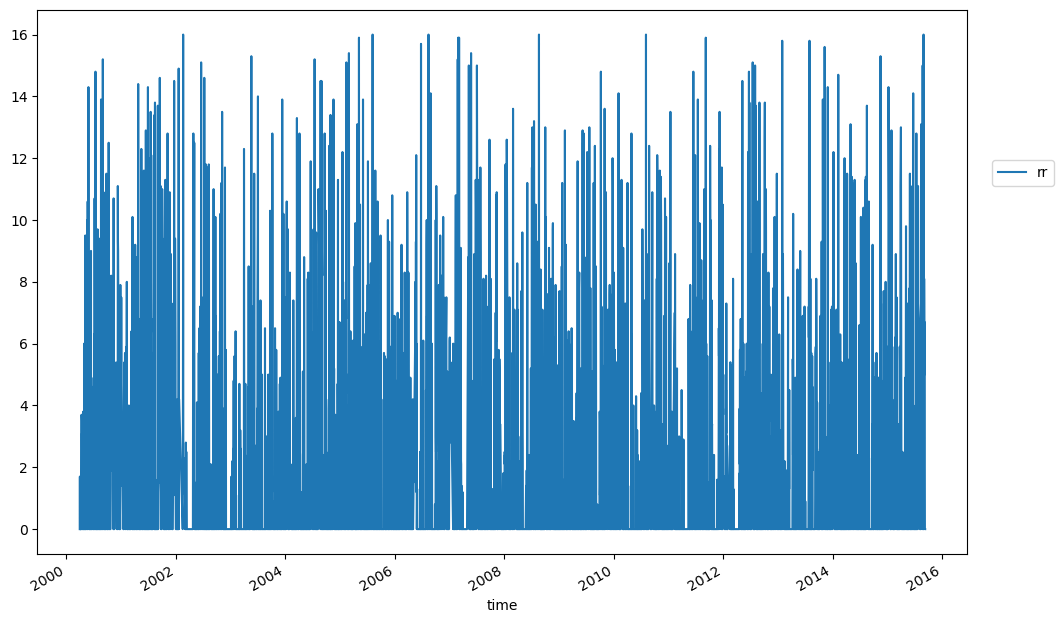

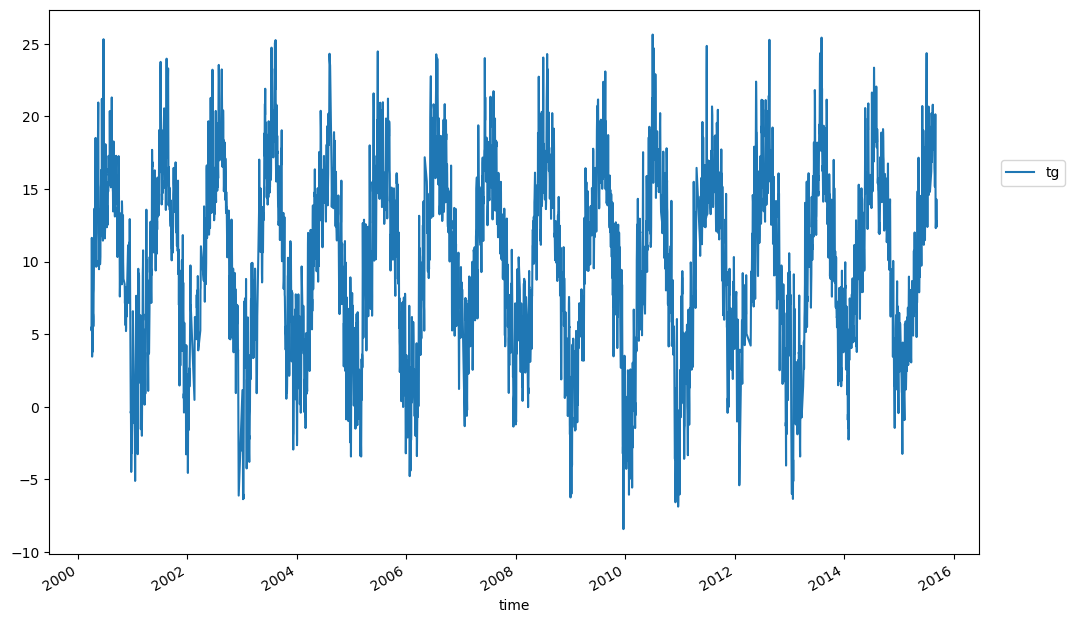

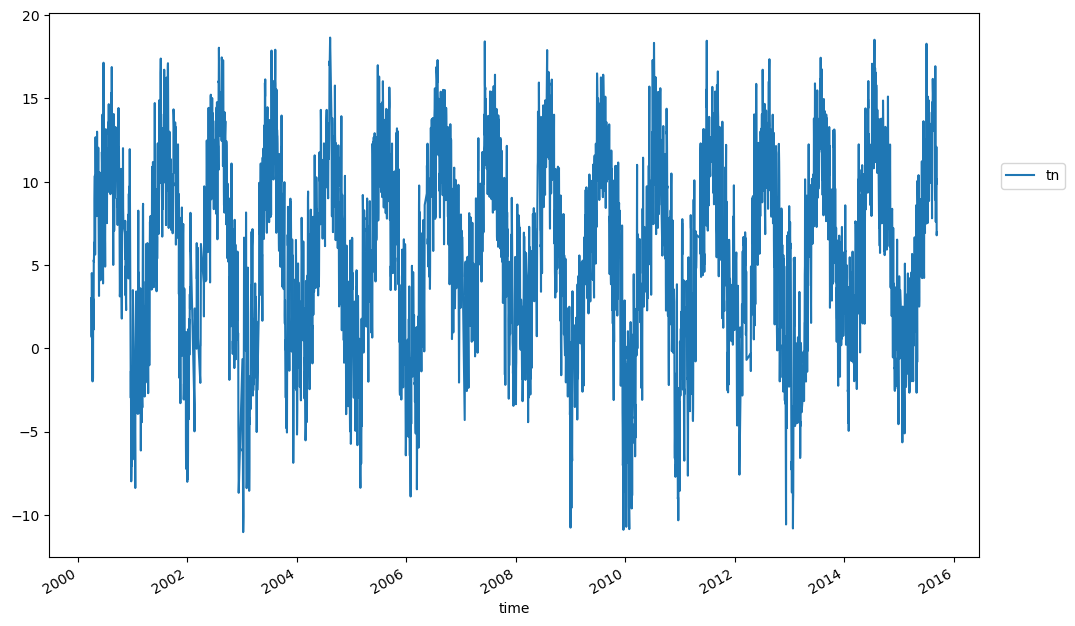

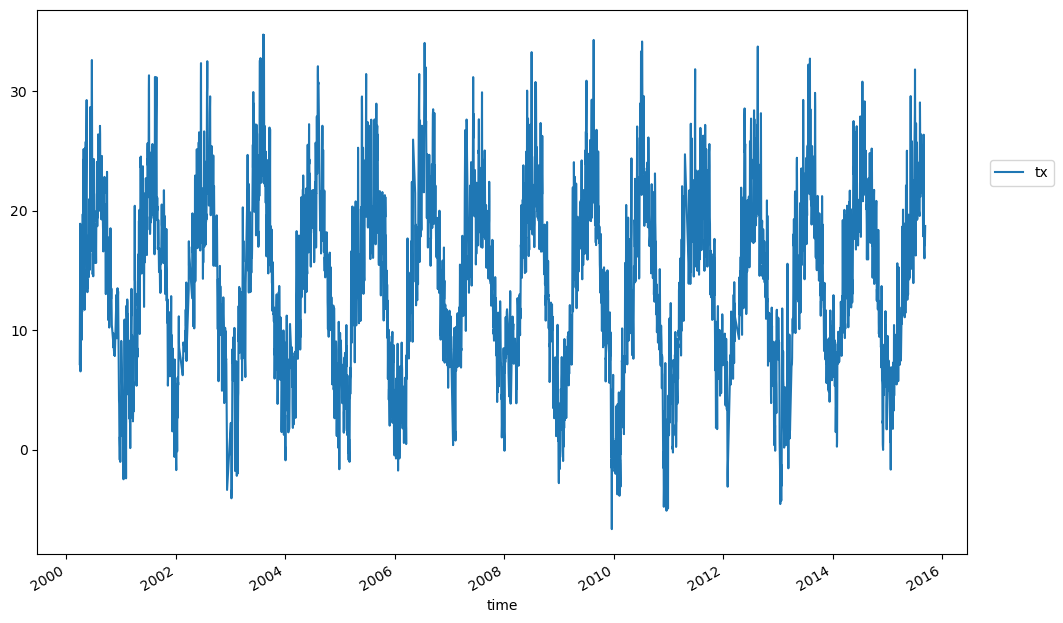

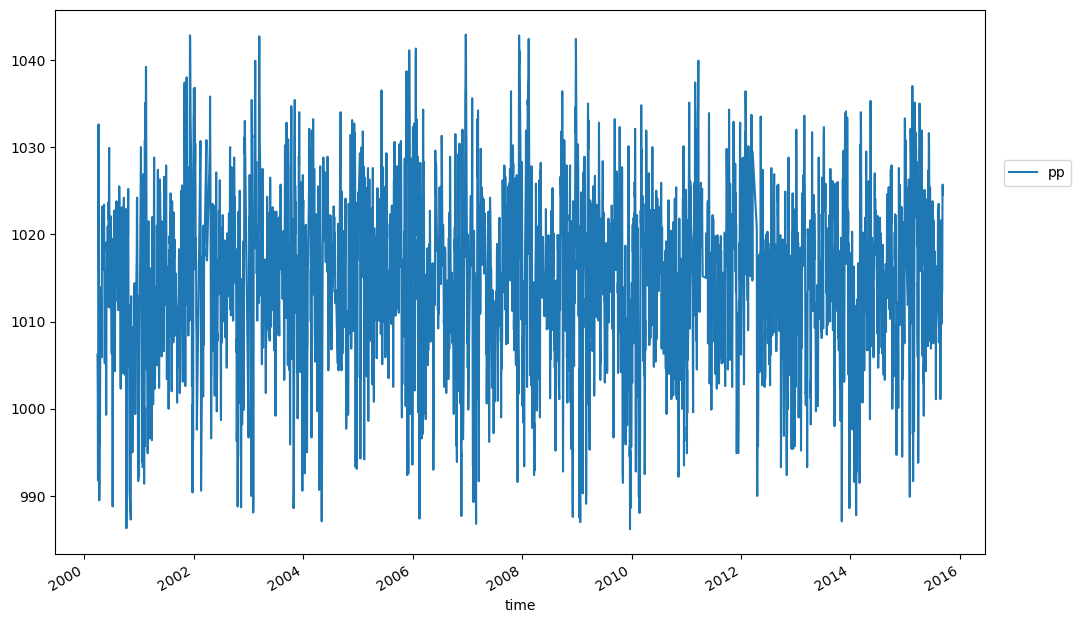

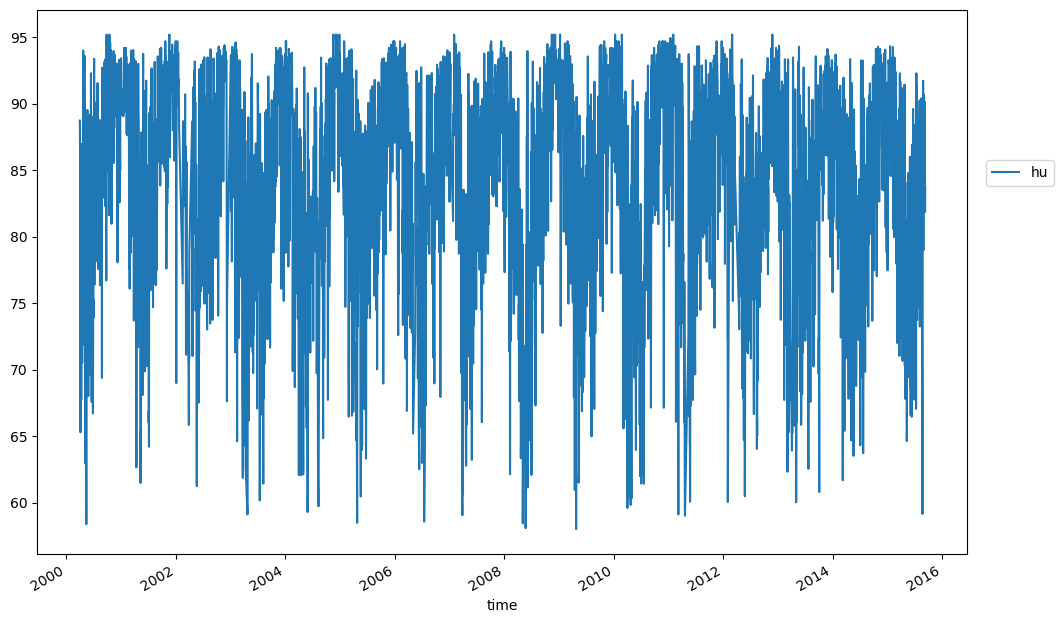

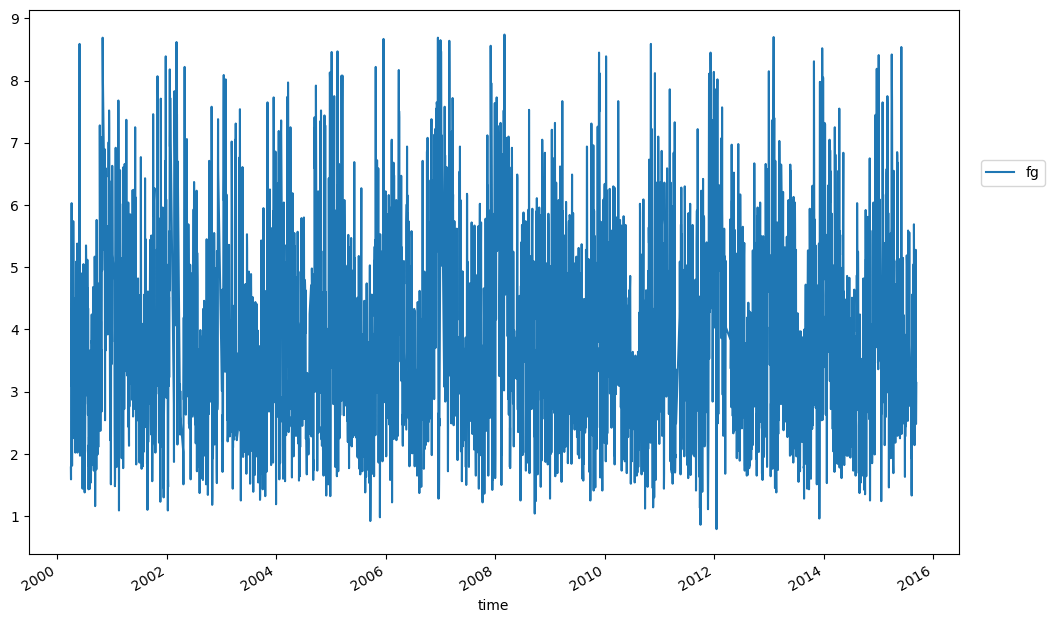

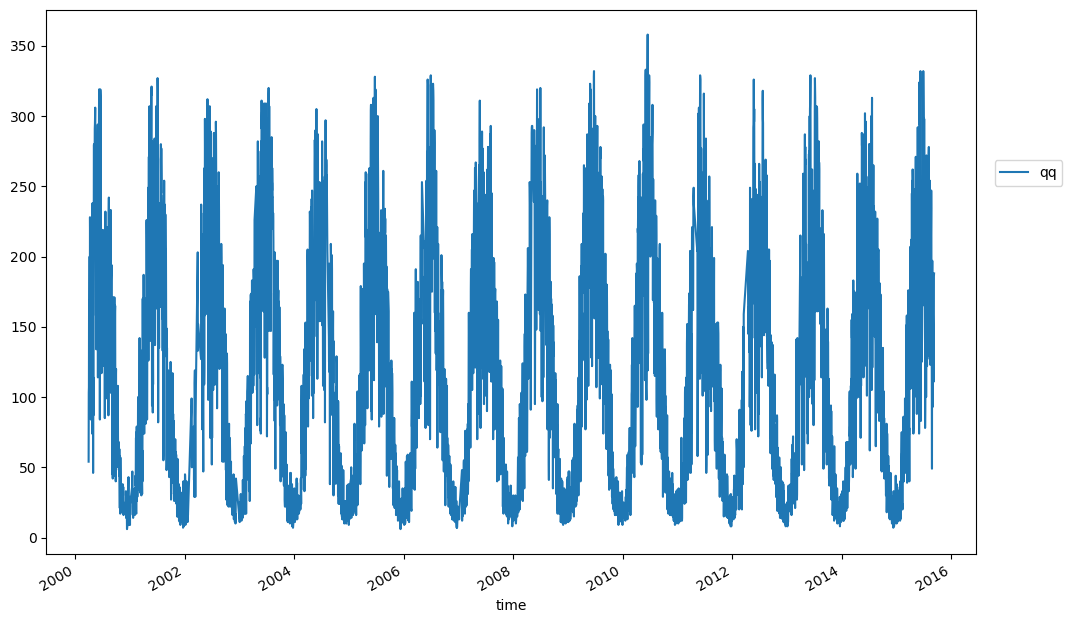

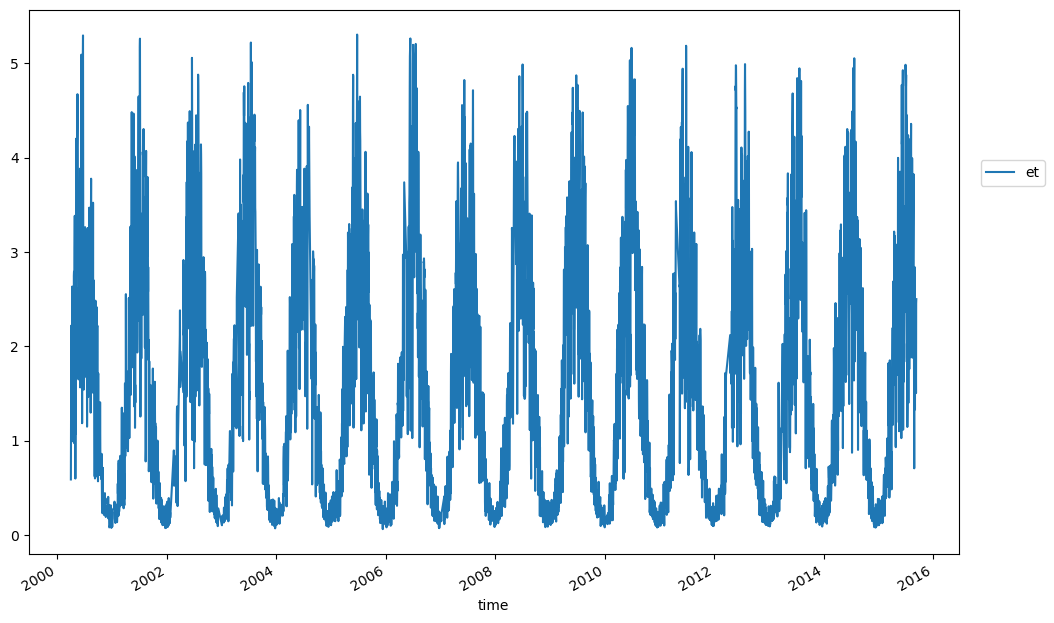

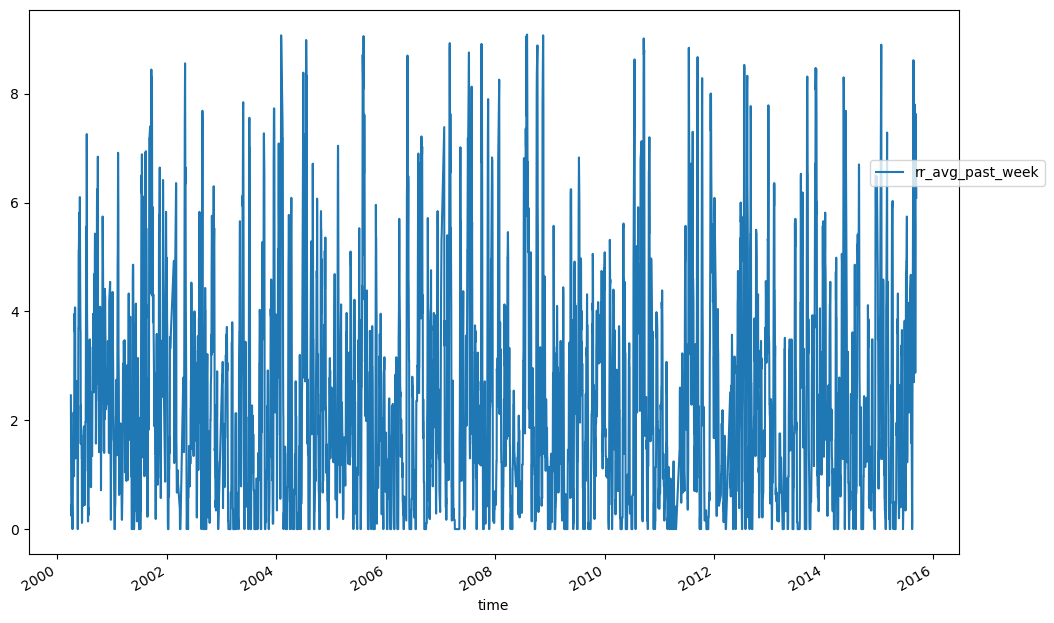

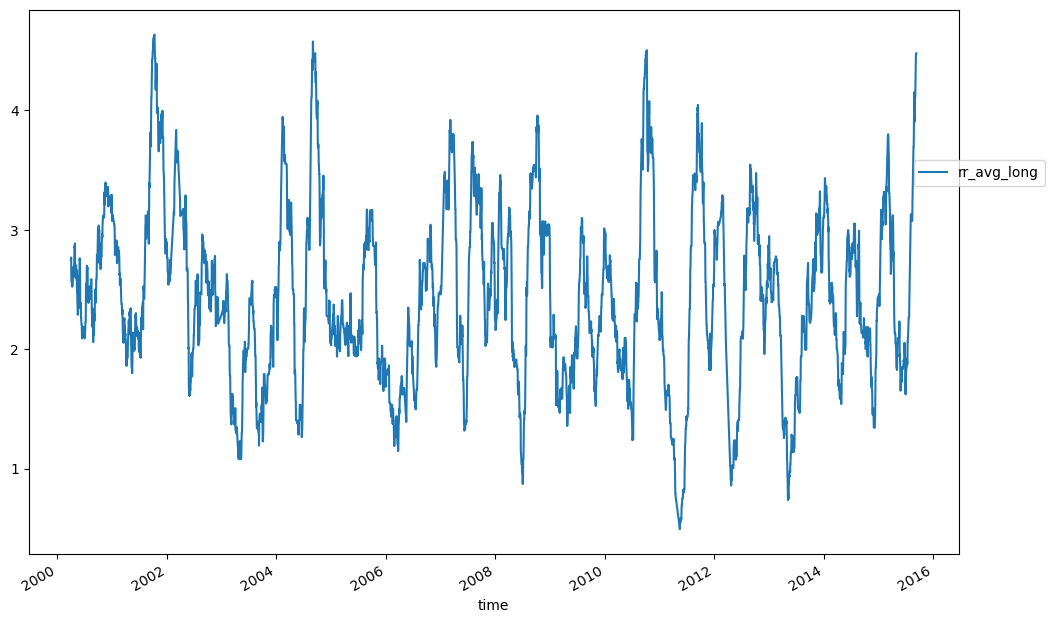

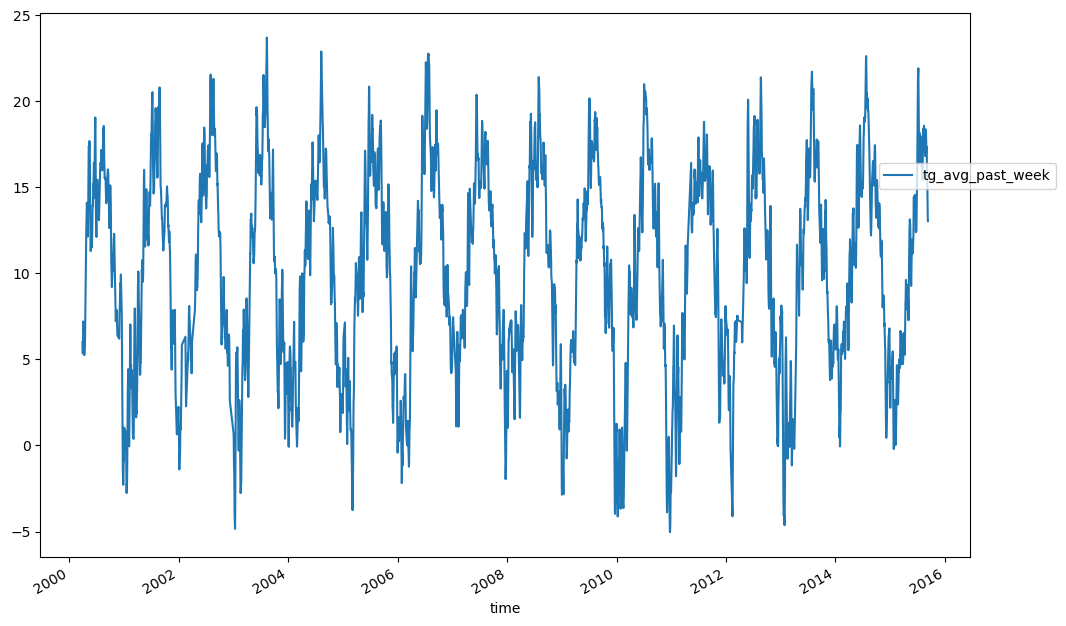

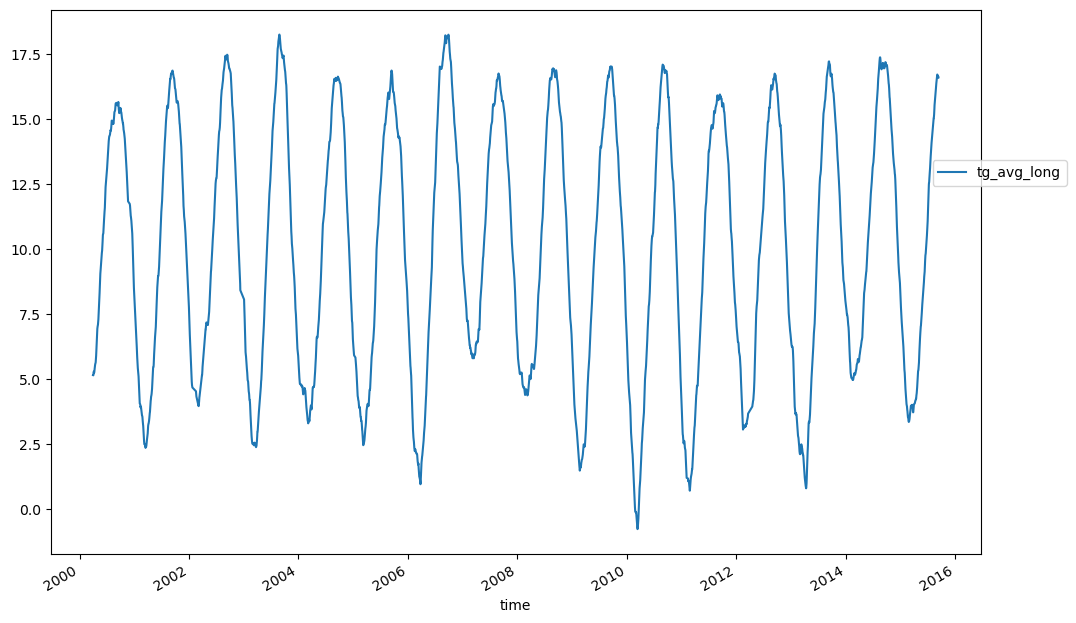

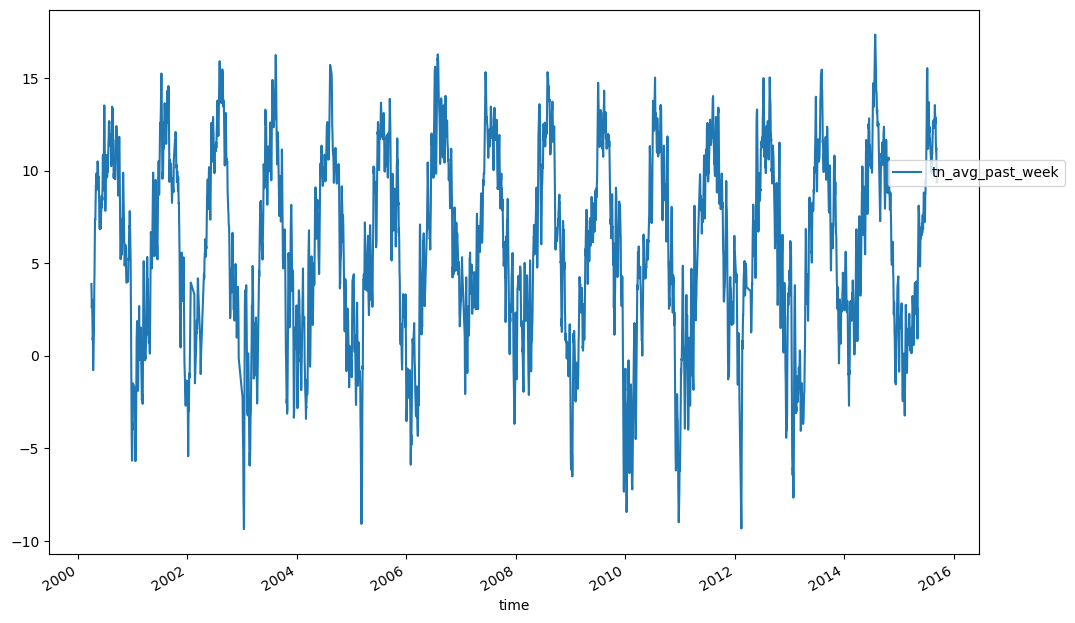

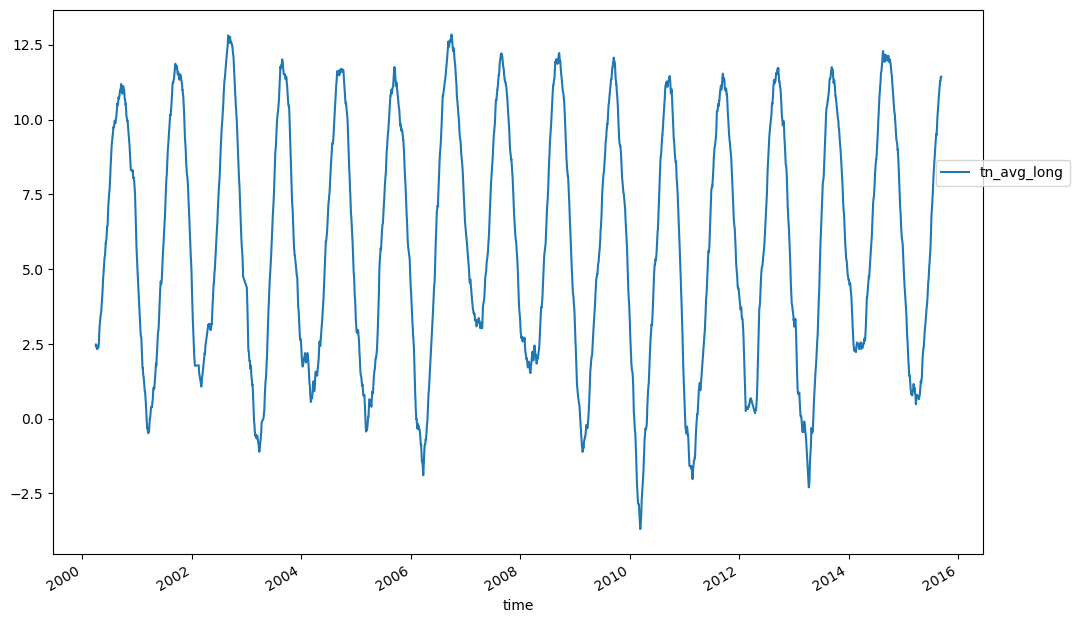

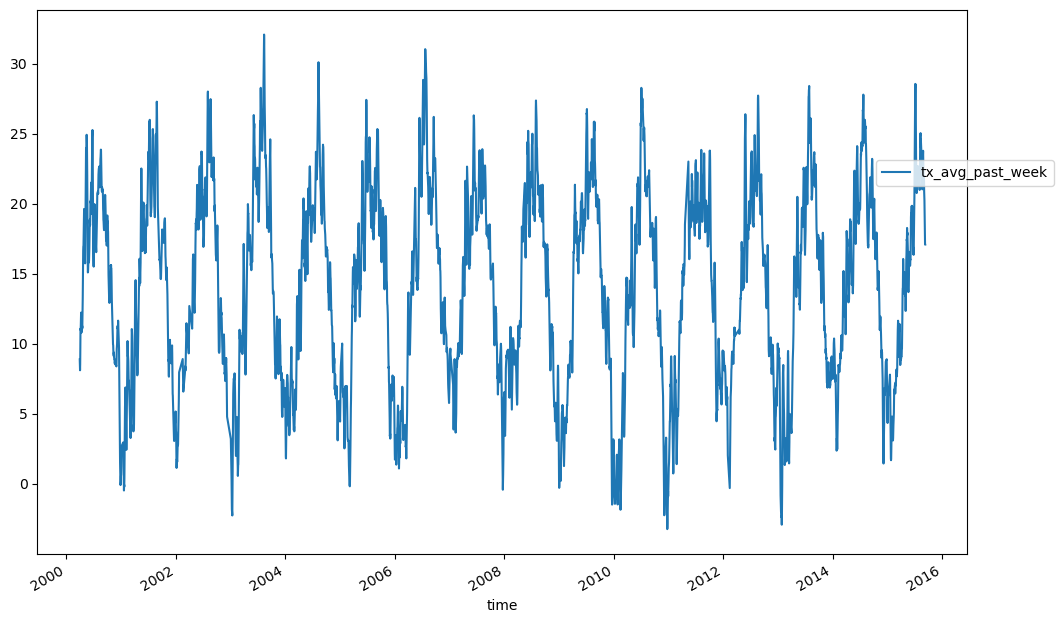

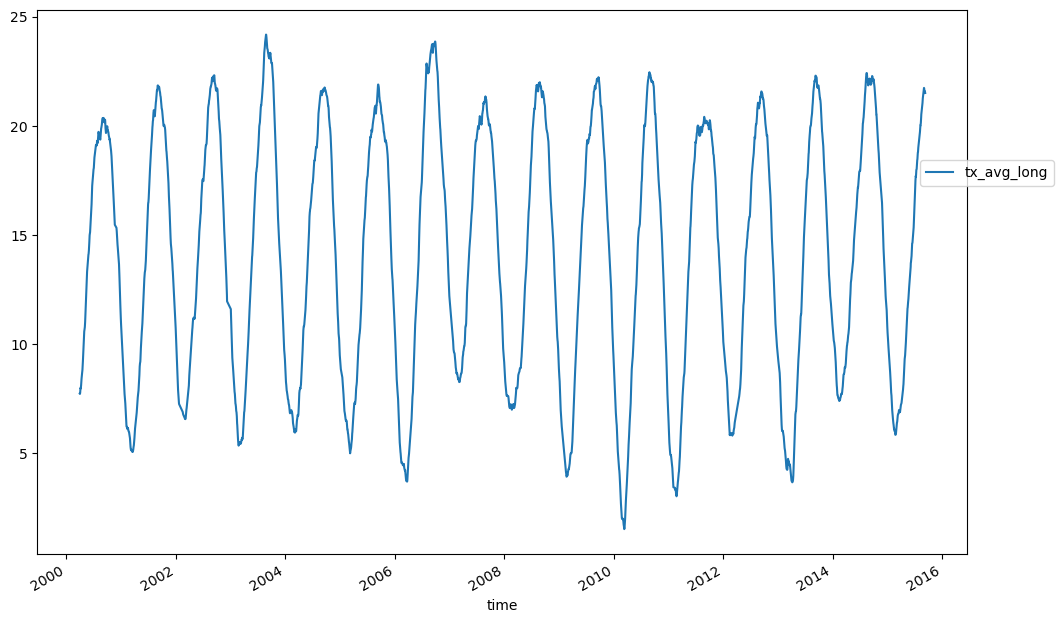

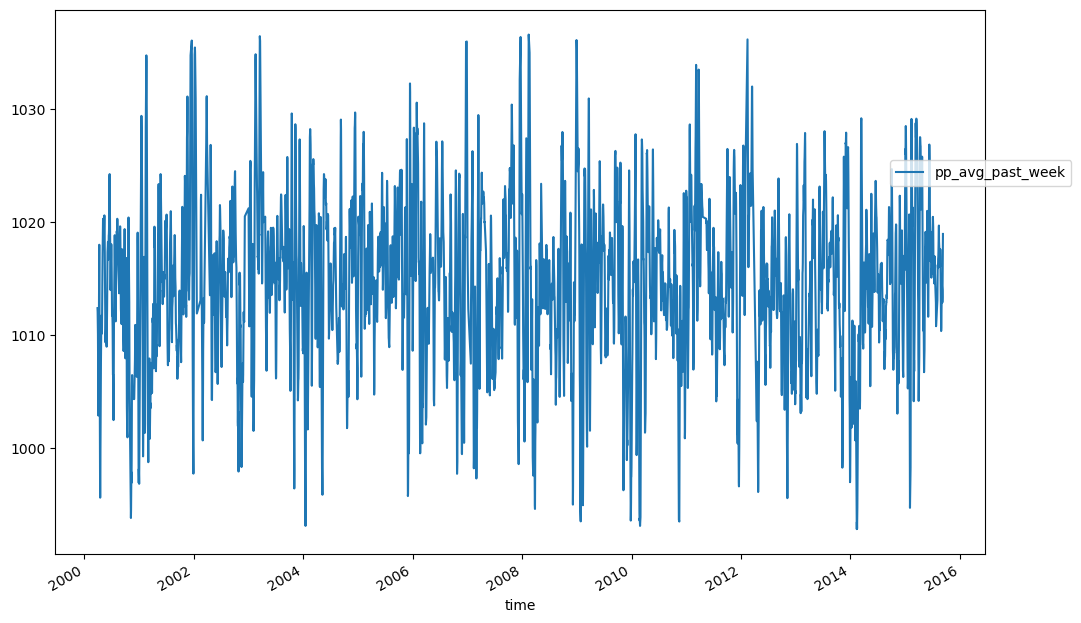

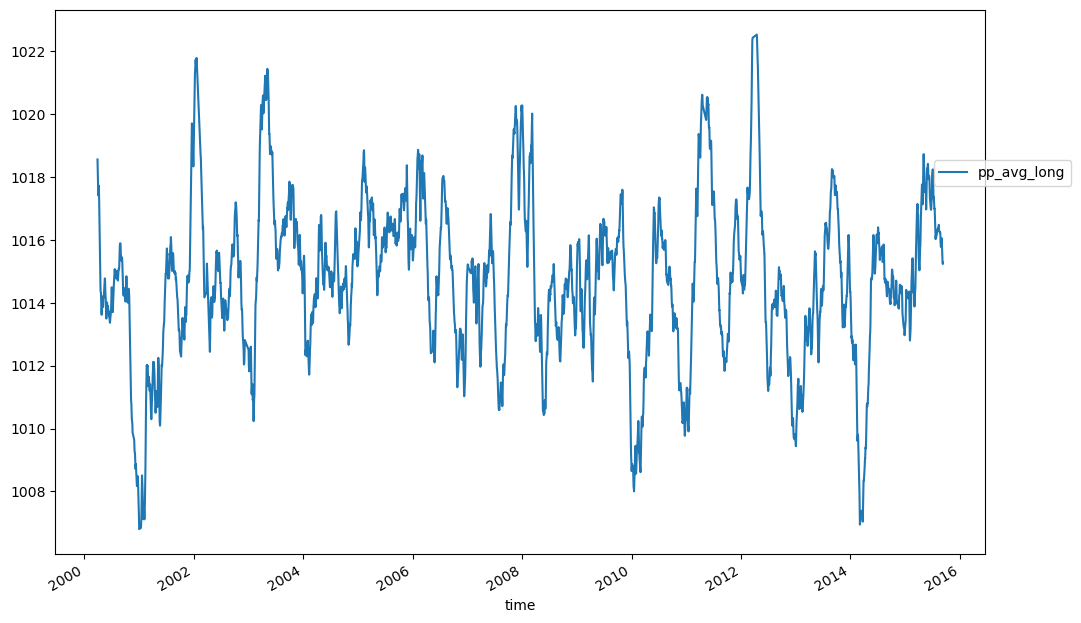

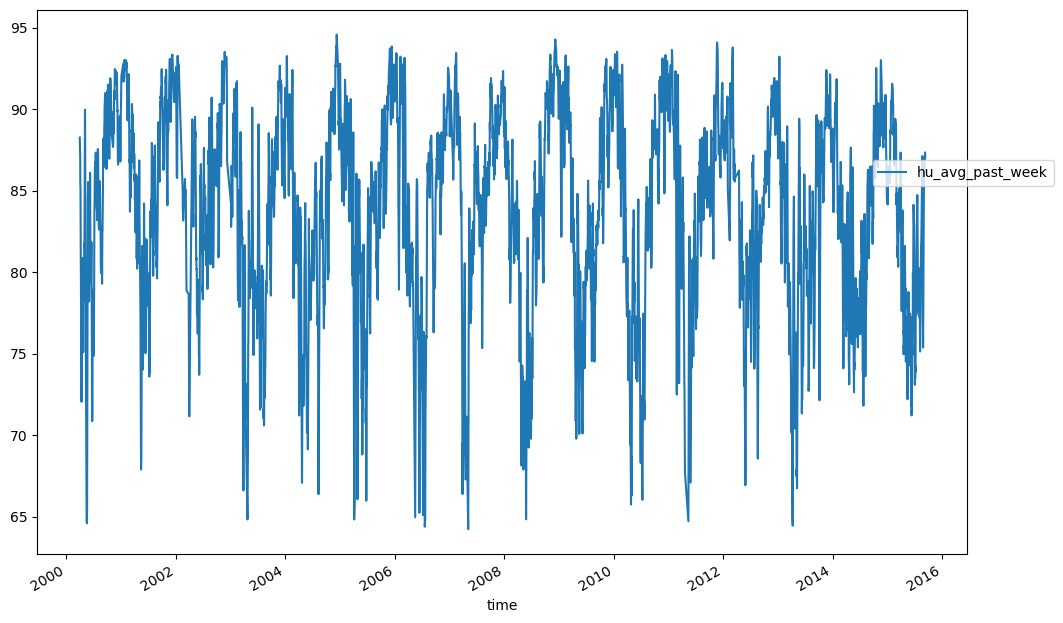

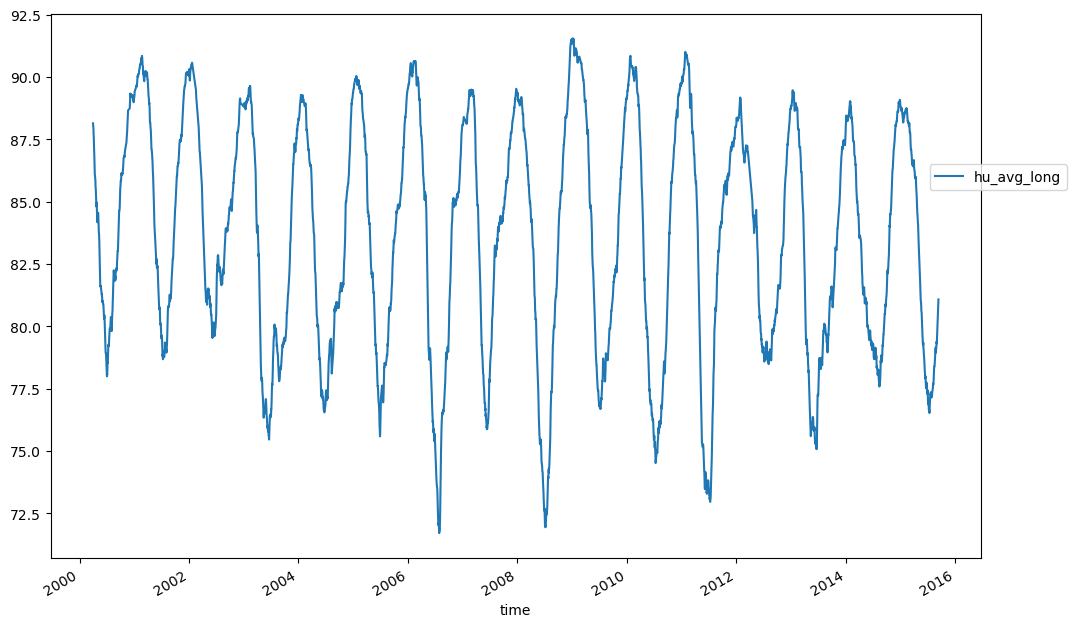

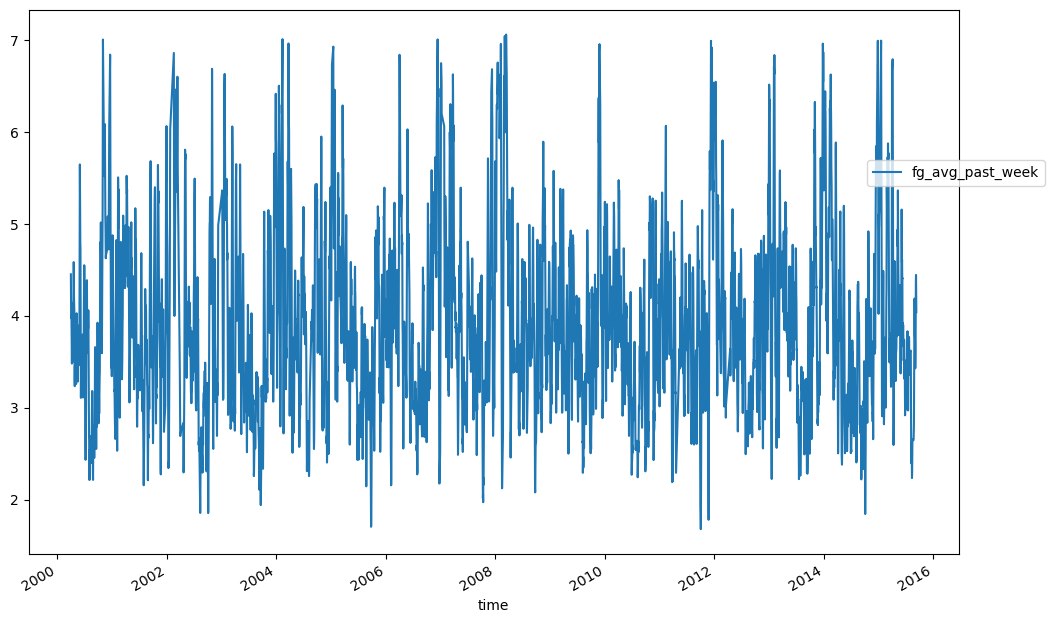

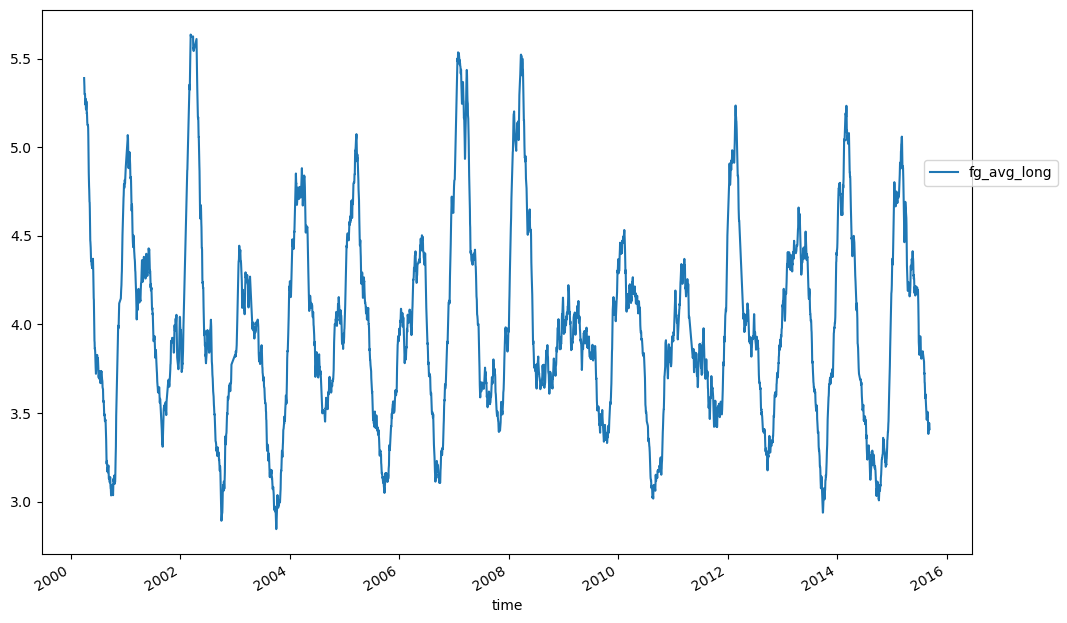

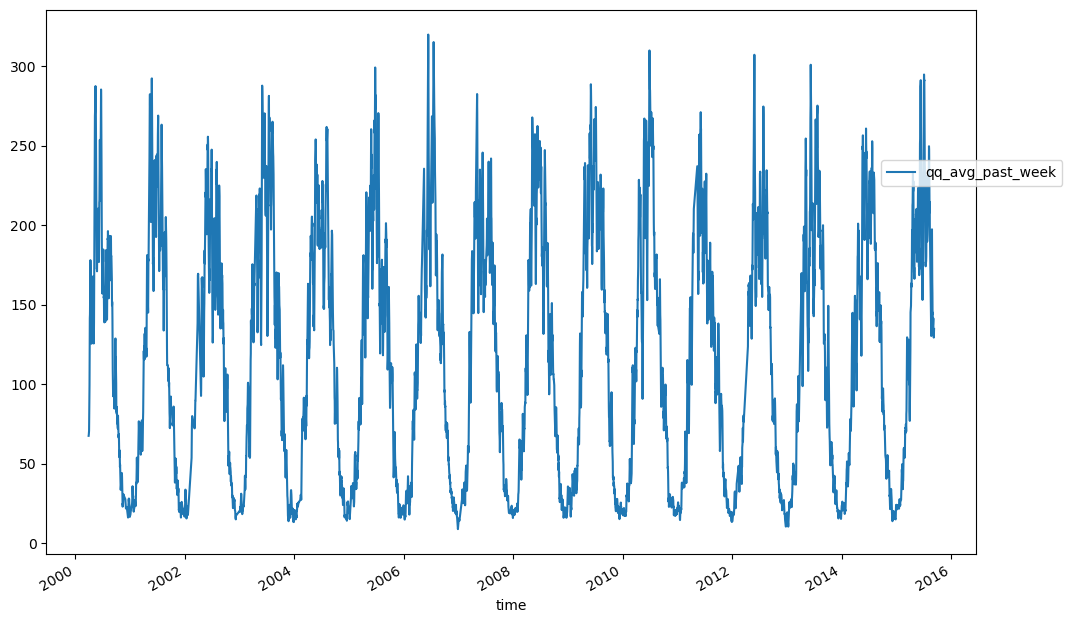

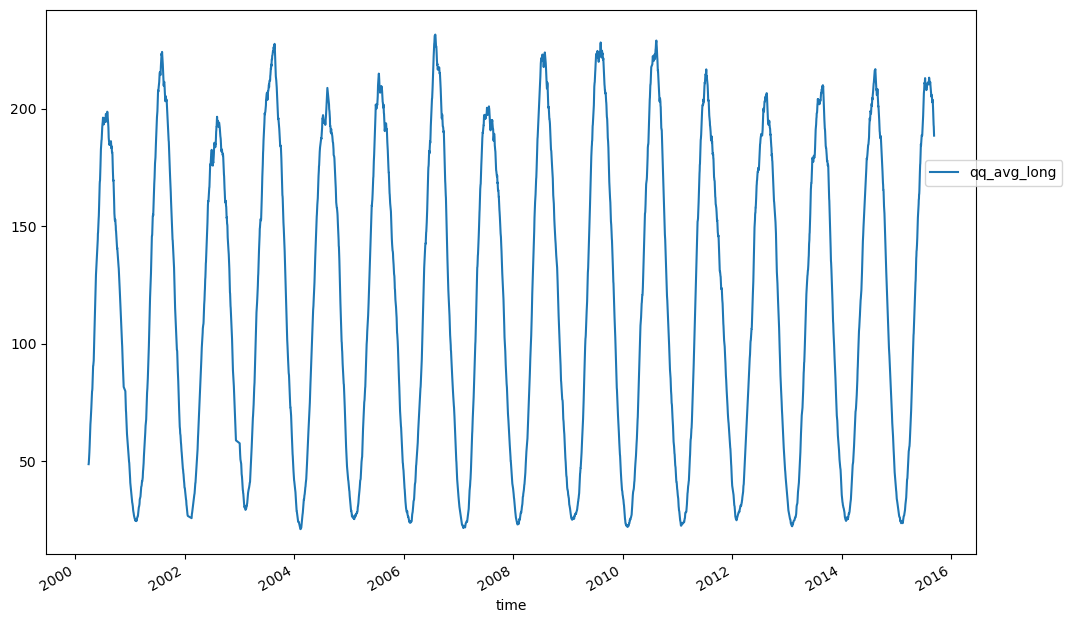

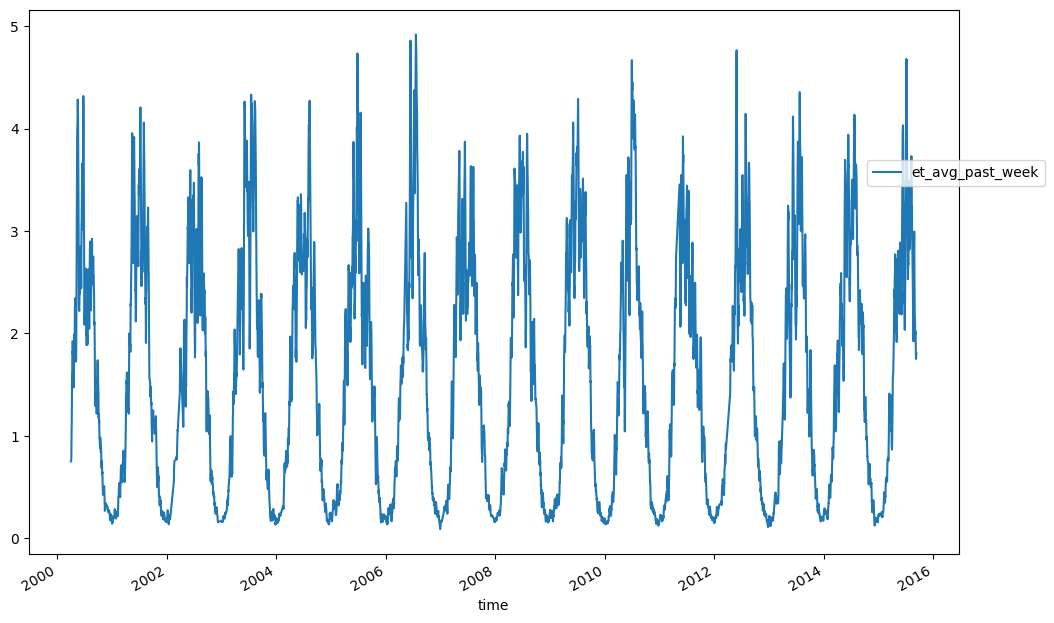

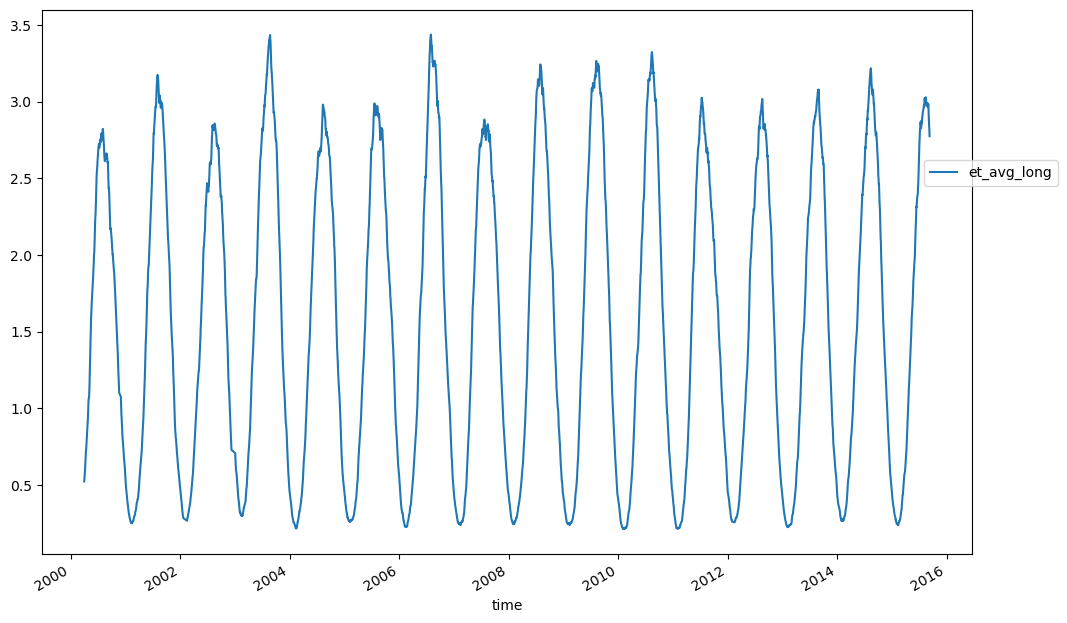

In [96]:
y_ave = np.mean(df_y)
for i in df_X.columns:
    df_X[i].plot(figsize=(12,8))
    plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.7))
    plt.show()

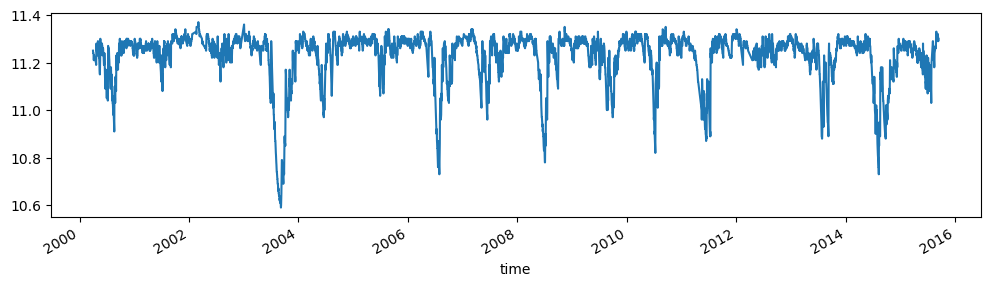

In [66]:
df_y.plot(figsize=(12,3))
plt.show()

In [67]:
df_X.columns

Index(['rr', 'tg', 'tn', 'tx', 'pp', 'hu', 'fg', 'qq', 'et',
       'rr_avg_past_week', 'rr_avg_long', 'tg_avg_past_week', 'tg_avg_long',
       'tn_avg_past_week', 'tn_avg_long', 'tx_avg_past_week', 'tx_avg_long',
       'pp_avg_past_week', 'pp_avg_long', 'hu_avg_past_week', 'hu_avg_long',
       'fg_avg_past_week', 'fg_avg_long', 'qq_avg_past_week', 'qq_avg_long',
       'et_avg_past_week', 'et_avg_long'],
      dtype='object')

[ 0.06099634  0.00558576 -0.00746227 -0.01467807 -0.02486334 -0.03521837
 -0.03893248 -0.03688527 -0.03756725 -0.04174883]


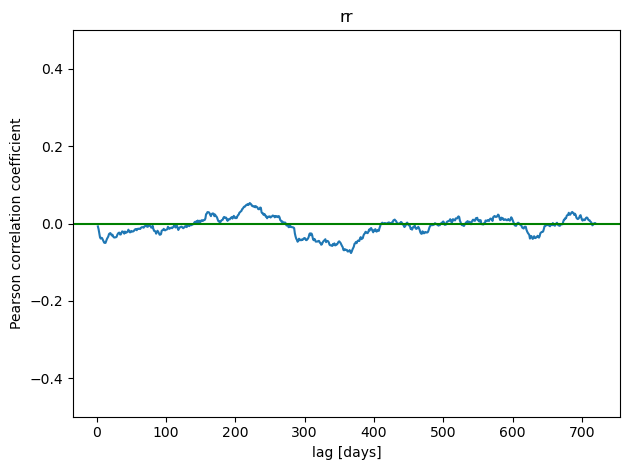

[-0.43832008 -0.43400777 -0.42518125 -0.41872208 -0.41440056 -0.41125931
 -0.40752422 -0.40361304 -0.39905633 -0.39341598]


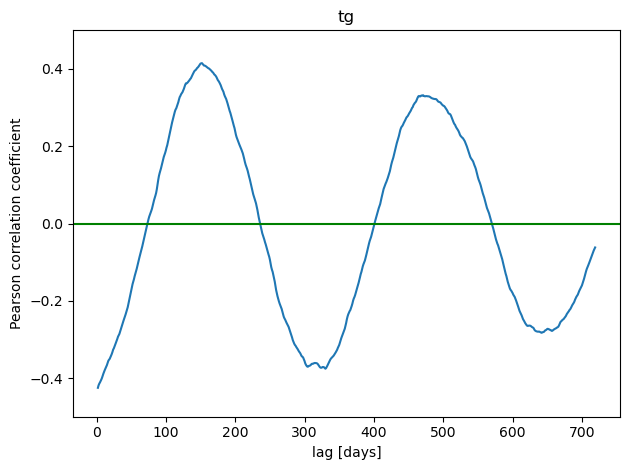

[-0.36952551 -0.38381821 -0.38258698 -0.38144448 -0.38008942 -0.37859595
 -0.37640508 -0.37520886 -0.37327538 -0.36936805]


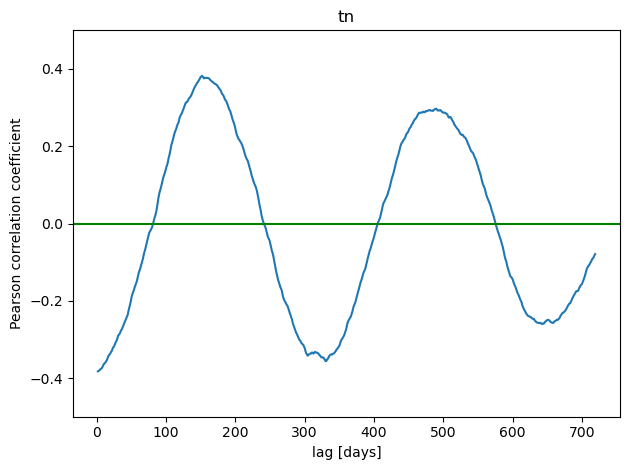

[-0.45927335 -0.4451332  -0.43218937 -0.42282823 -0.41704342 -0.41251924
 -0.40754214 -0.40144676 -0.39504425 -0.38879307]


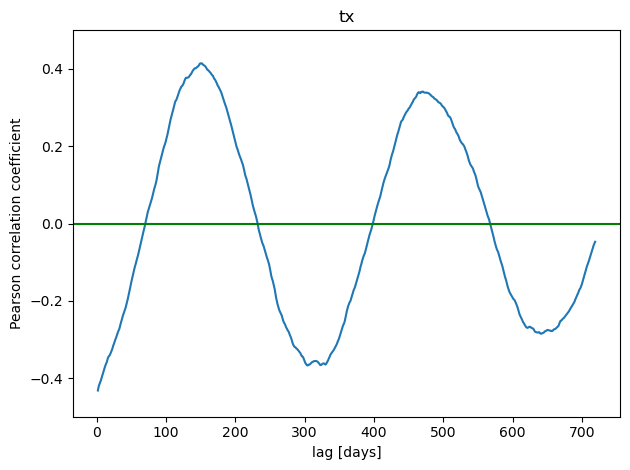

[-0.07313058 -0.0257023   0.00075343  0.01355868  0.02209602  0.02618674
  0.02871791  0.02925029  0.02733633  0.02349357]


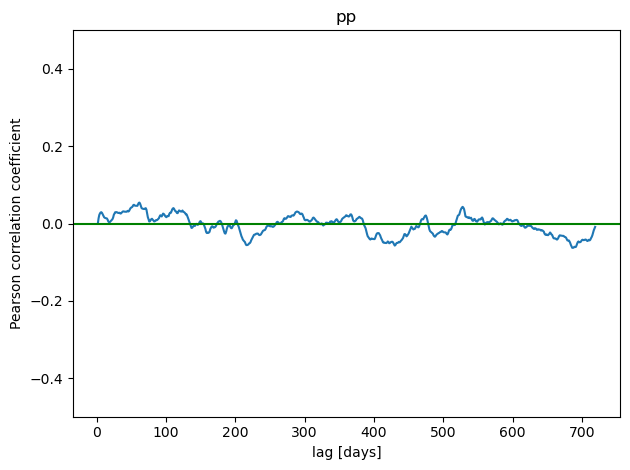

[0.27833906 0.23038766 0.20424693 0.18667635 0.17604453 0.16563287
 0.15539574 0.14269149 0.1330823  0.12390814]


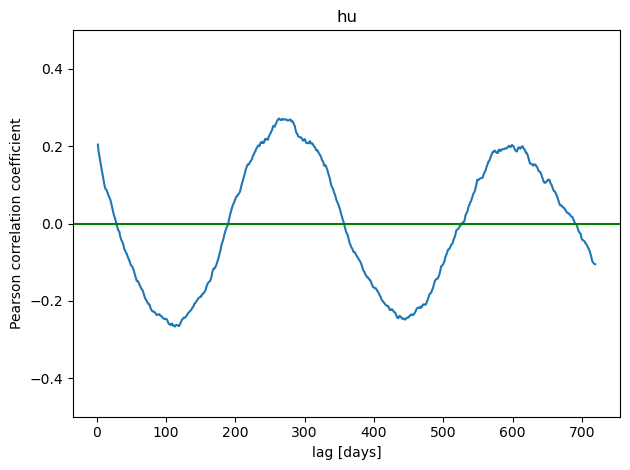

[0.23409004 0.1978547  0.18128089 0.17382106 0.16769749 0.16701432
 0.1648373  0.16161424 0.15688801 0.16009636]


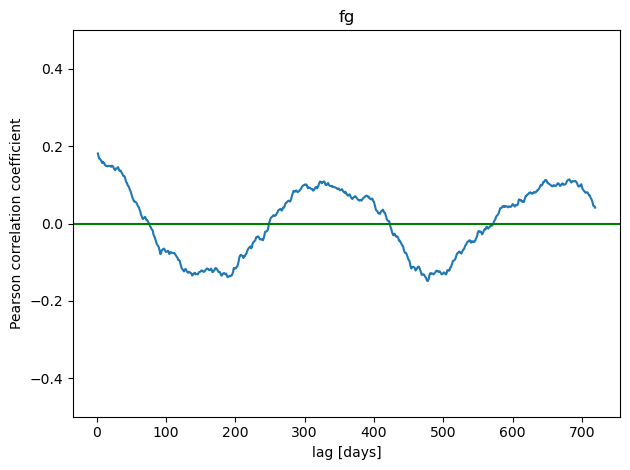

[-0.36998708 -0.33600762 -0.31680883 -0.30392441 -0.29407656 -0.28572038
 -0.27815489 -0.2691061  -0.26148287 -0.25412044]


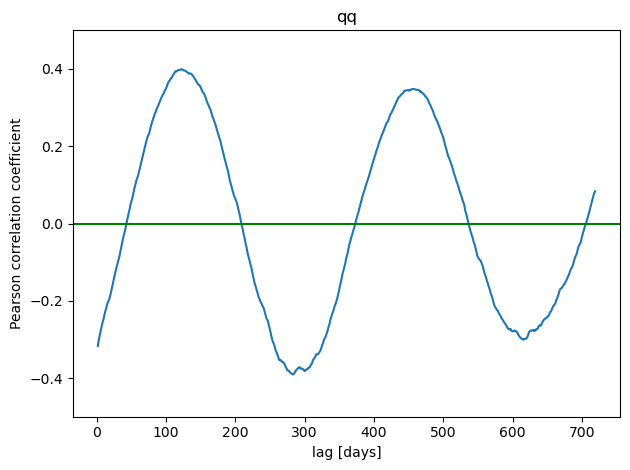

[-0.40952342 -0.37566446 -0.35509865 -0.34116377 -0.3308581  -0.32240304
 -0.31442361 -0.30487509 -0.29654391 -0.28845246]


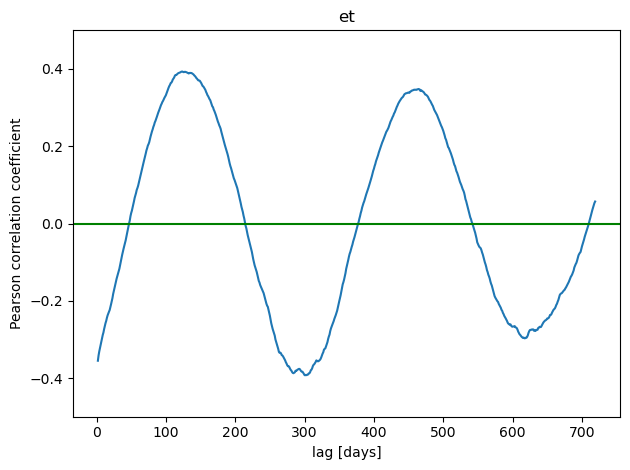

In [68]:
# creating an autocorrelation plot

# new dataframe for the autocorrelation
df_auto = df_X
df_auto['head'] = df_y
lags = np.arange(720)
corr_coefs = np.zeros(720)
for ftr in ['rr', 'tg', 'tn', 'tx', 'pp', 'hu', 'fg', 'qq', 'et']:
    for i in np.arange(len(lags)):
        x = df_auto[ftr].iloc[i:-1].reset_index(drop=True) # recent observations
        y = df_auto['head'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
        #print(x,y)
        # the shapes must be the same
        if x.shape != y.shape:
            raise ValueError('shape mismatch!')
        # Pearson correlation multiplied by the fraction of time series used
        corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df_auto[ftr].shape[0]
    print(corr_coefs[:10])

    plt.plot(lags[2:],corr_coefs[2:])
    plt.axhline(y=0,color='g')
    plt.ylim([-0.5,0.5])
    plt.xlabel('lag [days]')
    plt.ylabel('Pearson correlation coefficient')
    plt.title(ftr)
    plt.tight_layout()
    plt.show()

In [99]:
def create_features(df):
    df['year'] = df.index.year
    #df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.day_of_week
    #df['quarter'] = df.index.quarter
    return(df)

In [100]:
df_X = create_features(df_X)

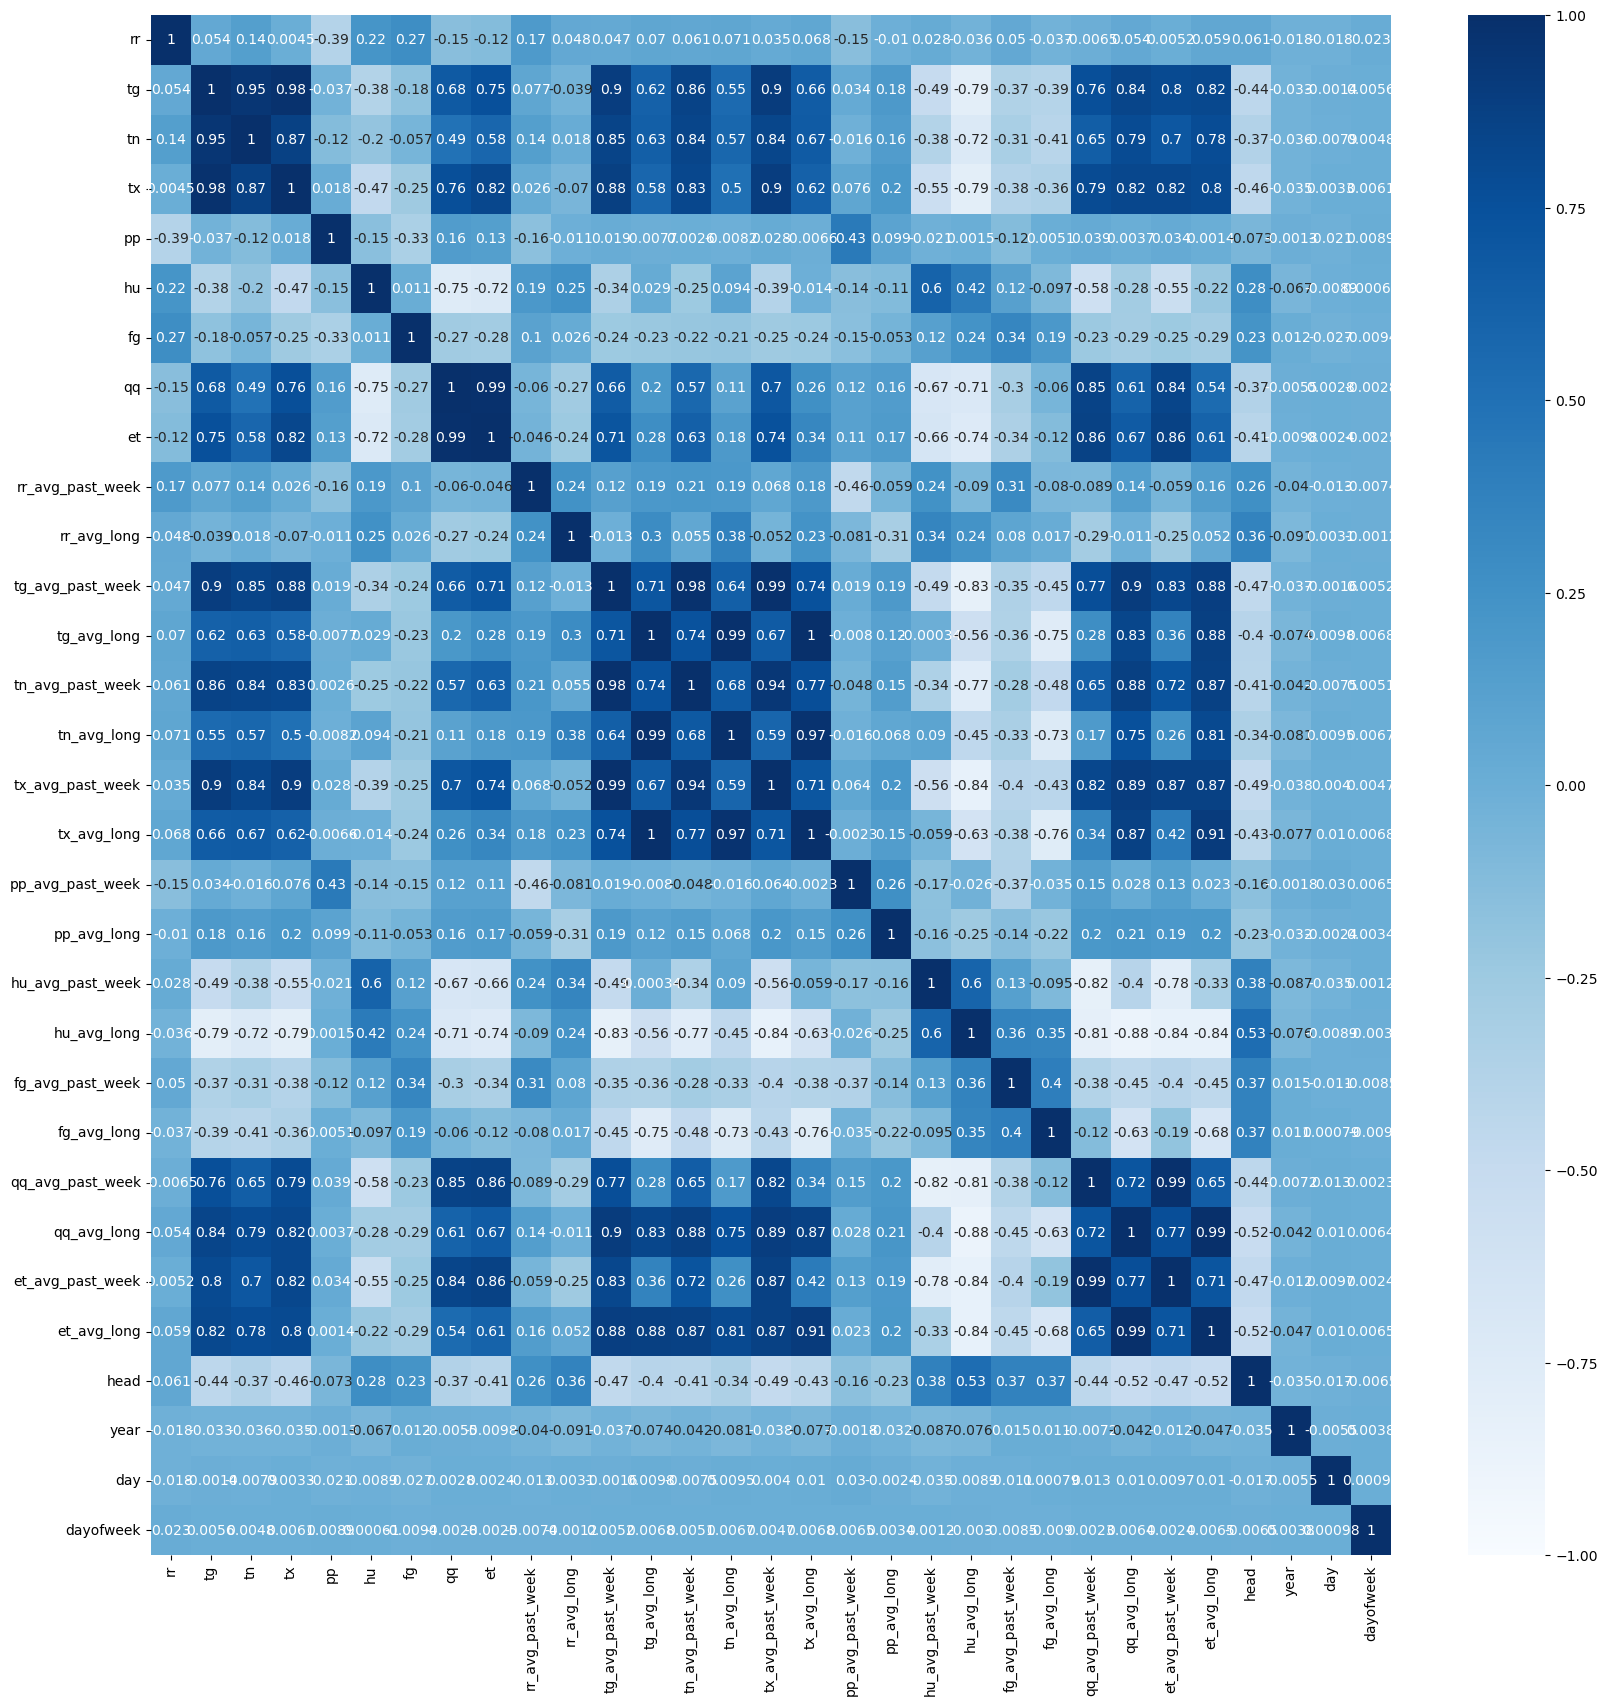

In [71]:
corr_matrix = df_X.corr()
plt.figure(figsize=(20,20))
# remember to always set the min max values! otherwise will be misleading
sns.heatmap(corr_matrix, cmap='Blues',vmin=-1,vmax=1, annot=True) 
plt.show()

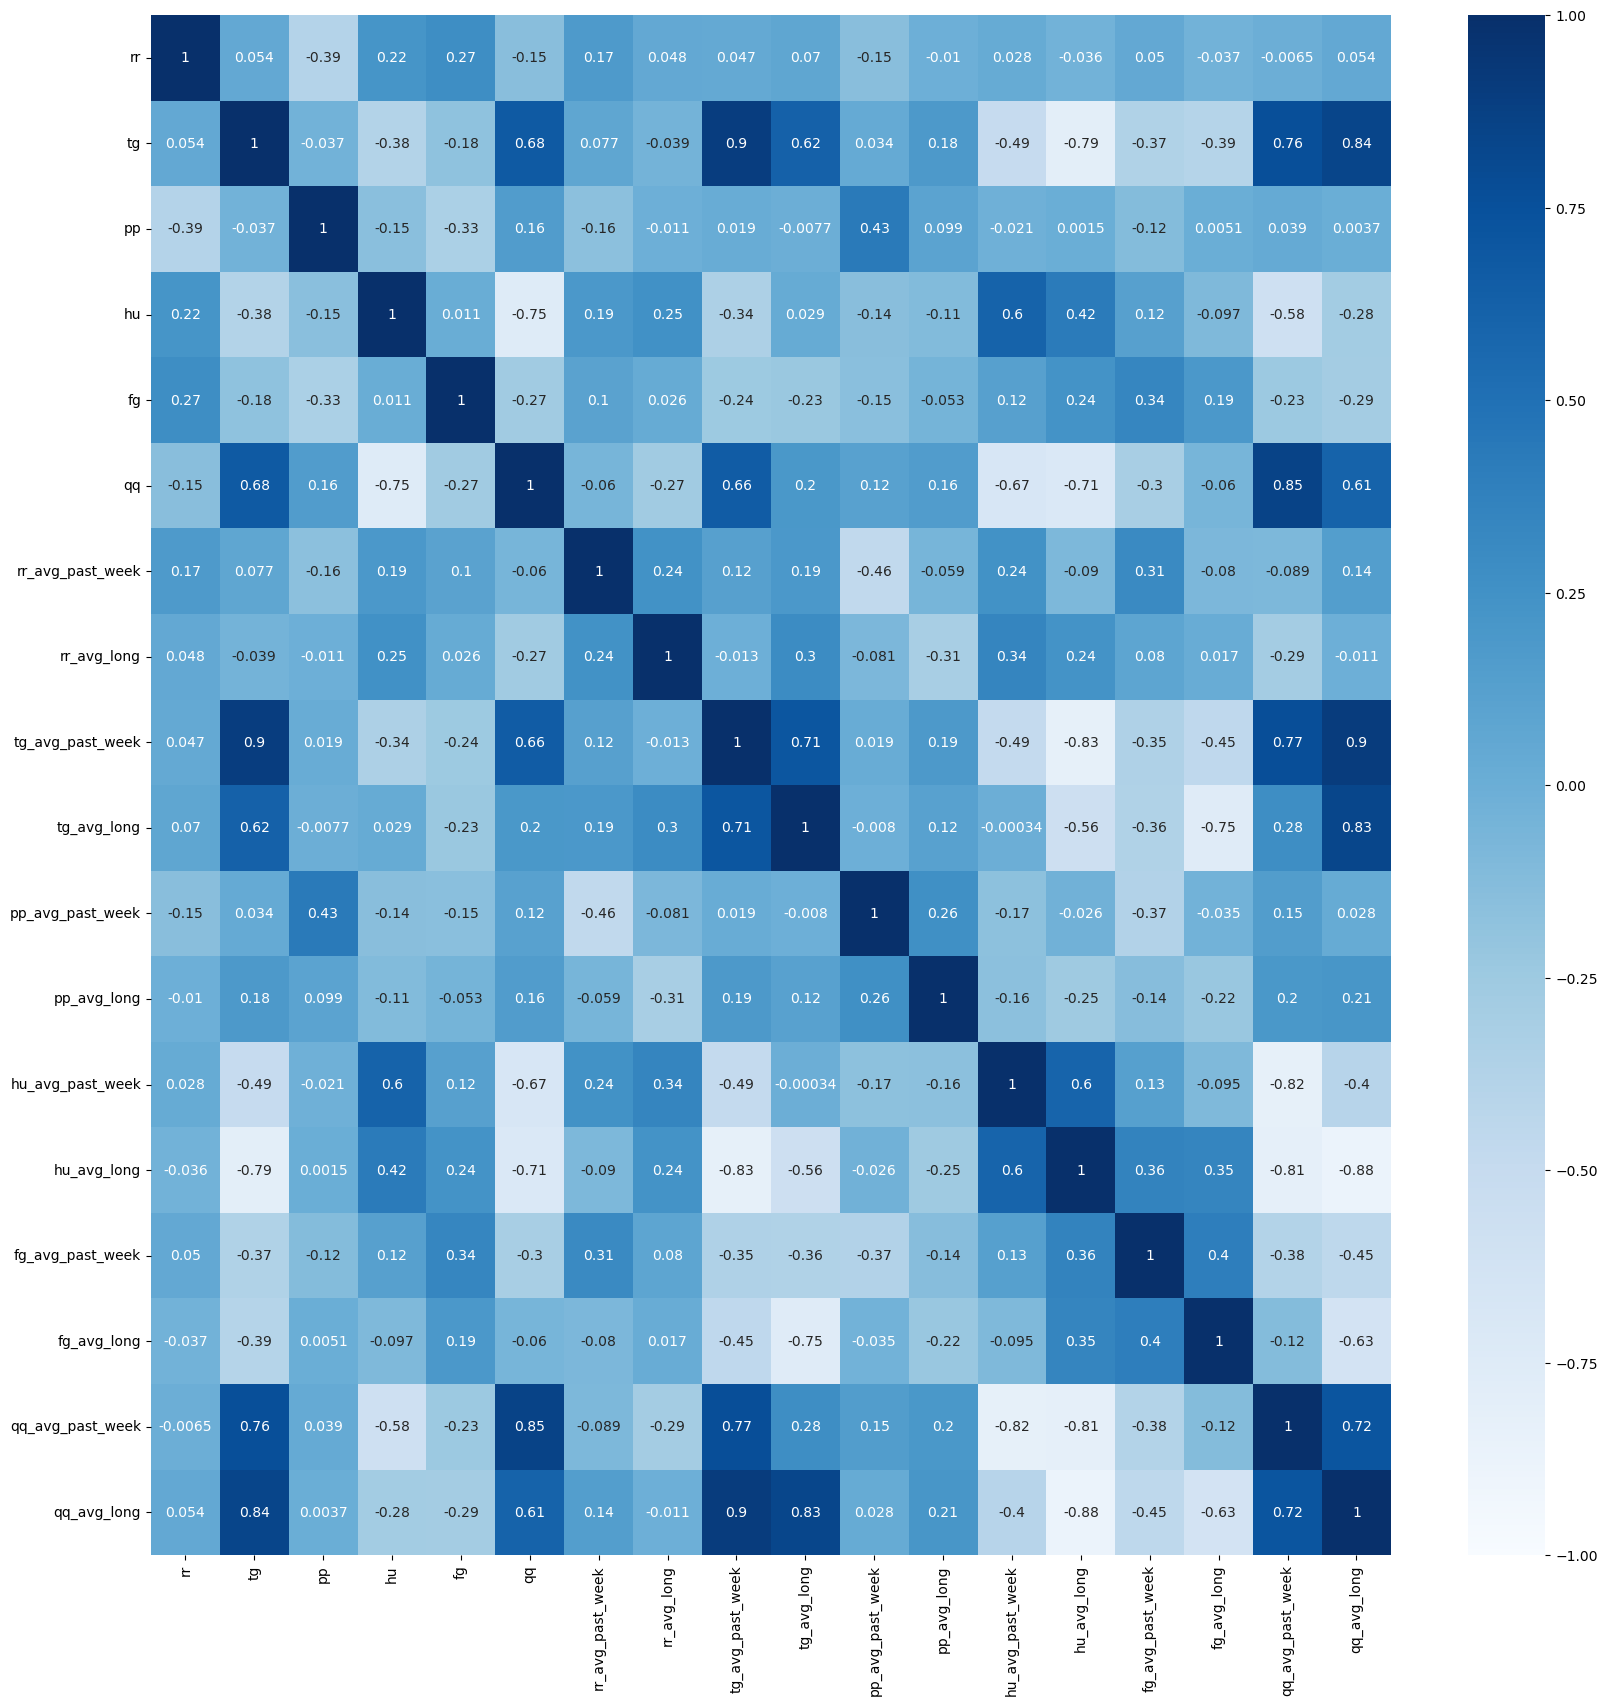

In [97]:
df_X = df_X.drop(columns=[col for col in df_X.columns if (col.startswith('tn') or col.startswith('tx') or col.startswith('et'))])
corr_matrix = df_X.corr()
plt.figure(figsize=(20,20))
# remember to always set the min max values! otherwise will be misleading
sns.heatmap(corr_matrix, cmap='Blues',vmin=-1,vmax=1, annot=True) 
plt.show()

# Modeling

### baseline predction score:

In [84]:
# split
df_y_train = df_y[df_y.index < '2012-01-01']
df_y_val = df_y[df_y.index >= '2012-01-01']

base_y_train = df_y_train
base_y_val = df_y_val

In [85]:
# calculate baseline RMSE
from sklearn.metrics import mean_squared_error

base_y_train['year'] = df_y_train.index.year
base_y_train['month'] = df_y_train.index.month
base_y_train['day'] = df_y_train.index.day

base_prediction = base_y_train.groupby(['month','day'])['head'].mean().reset_index()

base_y_val = df_y_val
base_y_val['month'] = df_y_val.index.month
base_y_val['day'] = df_y_val.index.day

base_y_val = pd.merge(base_y_val, base_prediction, on=['month','day'], how='left')
base_y_val.rename(columns={'head_x':'head_true','head_y':'head_pred'}, inplace=True)

baseline_RMSE = mean_squared_error(base_y_val['head_true'],base_y_val['head_pred'])

/var/folders/3h/rwm3946s6m393kd1m_w94xl00000gn/T/ipykernel_38619/3804655241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_y_train['year'] = df_y_train.index.year
/var/folders/3h/rwm3946s6m393kd1m_w94xl00000gn/T/ipykernel_38619/3804655241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_y_train['month'] = df_y_train.index.month
/var/folders/3h/rwm3946s6m393kd1m_w94xl00000gn/T/ipykernel_38619/3804655241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [86]:
baseline_RMSE

0.007913267647156911

In [205]:
reg = xgb.XGBRegressor(n_estimators=2000,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(df_X_train,df_y_train,eval_set=[(df_X_train,df_y_train),(df_X_val,df_y_val)],verbose=100)

[0]	validation_0-rmse:370.45880	validation_1-rmse:370.38584
[100]	validation_0-rmse:135.63555	validation_1-rmse:135.56244
[200]	validation_0-rmse:49.66085	validation_1-rmse:49.58733
[300]	validation_0-rmse:18.18479	validation_1-rmse:18.11017
[400]	validation_0-rmse:6.66483	validation_1-rmse:6.58835
[500]	validation_0-rmse:2.45479	validation_1-rmse:2.38453
[600]	validation_0-rmse:0.92599	validation_1-rmse:0.86149
[700]	validation_0-rmse:0.38302	validation_1-rmse:0.33575
[800]	validation_0-rmse:0.20704	validation_1-rmse:0.20311
[900]	validation_0-rmse:0.15594	validation_1-rmse:0.19747
[902]	validation_0-rmse:0.15521	validation_1-rmse:0.19757


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

# Feature Importance

In [206]:
fi = pd.DataFrame(data=reg.feature_importances_,index=reg.feature_names_in_,columns=["importance"])

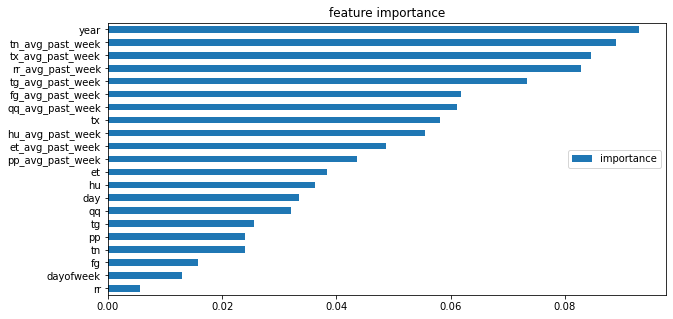

In [207]:
fi.sort_values('importance').plot(kind='barh',title="feature importance",figsize=(10,5))
plt.legend(loc='right')
plt.show()

# pipline

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit


# df_X_train = df_X[df_X.index<'2014-01-01']
# df_y_train = df_y[df_y.index<'2014-01-01']
# df_X_val = df_X[df_X.index>='2014-01-01']
# df_y_val = df_y[df_y.index>='2014-01-01']

# The function which takes the unprocessed feature matrix, target variable, 
# a preprocessor (ColumnTransformer), an initialized ML algorithm, and a correspondig parameter grid as inputs.
def MLpipe_KFold_RMSE(ColumnTransformer, ML_algorithm, parameter_grid):
    
    # collect all the encoders into one preprocessor
    preprocessor = ColumnTransformer

    prep = Pipeline(steps=[('preprocessor', preprocessor)]) 
    
    # Use GridSearchCV and the parameter names need to contain the ML algorithm
    param_grid = parameter_grid 
    
    nr_states = 1 # number of random states
    test_scores = np.zeros(nr_states)
    final_models = []

    for i in range(nr_states):
        # first split to separate out the test set
        # use kfold on other
        feature_matrix_other=df_X[df_X.index<'2012-01-01']
        feature_matrix_test=df_X[df_X.index>='2012-01-01']
        target_variable_other_df=df_y[df_y.index<'2012-01-01']
        target_variable_test_df=df_y[df_y.index>='2012-01-01']
        target_variable_other=target_variable_other_df.values.ravel()
        target_variable_test=target_variable_test_df.values.ravel()

        # splitter for other using k kfold
        tsp = TimeSeriesSplit(n_splits=4)

        # the classifier
        if ML_algorithm in [SVR, KNeighborsRegressor]:
            clf = ML_algorithm()
        else:
            clf = ML_algorithm(random_state = 42*i) # initialize the classifier
        
        
        # put together a pipeline
        # the pipeline will fit_transform the training set (4 folds), and transform the last fold used as validation
        # then it will train the ML algorithm on the training set and evaluate it on the validation set
        # it repeats this step automatically such that each fold will be an evaluation set once
        pipe = make_pipeline(preprocessor,clf)

        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'neg_mean_squared_error',
                            cv=tsp, return_train_score = True, n_jobs=-1, verbose=True)
        
        # this line actually fits the model on other
        grid.fit(feature_matrix_other, target_variable_other)
        # save results into a data frame.
        results = pd.DataFrame(grid.cv_results_)
        print(results)

        print('best model parameters:',grid.best_params_)
        #print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
        final_models.append(grid)
        # calculate and save the test score
        target_variable_test_pred = final_models[-1].predict(feature_matrix_test)
        test_scores[i] = (mean_squared_error(target_variable_test,target_variable_test_pred)) #use RMSE as test score
        print('test score:',test_scores[i])
        
        prediction = pd.DataFrame(target_variable_test_pred,index=target_variable_test_df.index)
        ax = target_variable_test_df.plot(figsize=(10,6))
        prediction.plot(ax=ax)
        plt.legend(["test_data","predict"])
        plt.show()
    
    # print out mean and std of test scores
    print('mean of test scores:',np.mean(test_scores))
    #print('standard deviation of test scores:',np.std(test_scores,ddof=1))
    


In [91]:
df_X.shape, df_y.shape

((5018, 22), (5606, 1))

Fitting 4 folds for each of 11 candidates, totalling 44 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.032596      0.009145         0.017597        0.010680   
1        0.027698      0.002835         0.011349        0.003013   
2        0.020671      0.003446         0.013126        0.003115   
3        0.024523      0.010251         0.009098        0.001527   
4        0.024541      0.003688         0.010681        0.004492   
5        0.023026      0.003893         0.006328        0.001092   
6        0.018816      0.006761         0.008943        0.002896   
7        0.015583      0.004184         0.010473        0.002604   
8        0.016072      0.002690         0.006766        0.000232   
9        0.018934      0.003076         0.009438        0.004584   
10       0.013963      0.002837         0.006042        0.001431   

   param_lasso__alpha                                  params  \
0                0.01                  {'lasso__alpha': 0

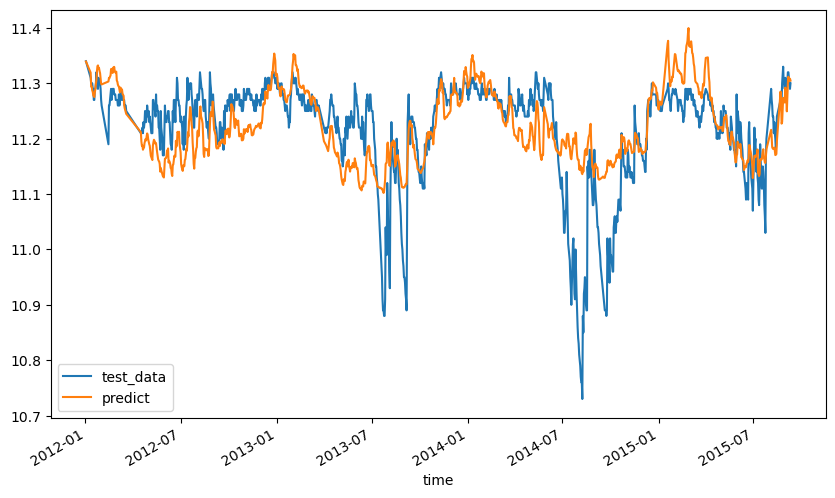

mean of test scores: 0.006169281963698247


In [101]:
# lasso regression with avg_past_week
onehot_ftrs = ['year','day','dayofweek']
std_ftrs = [col for col in df_X.columns if col not in onehot_ftrs]

columnTransformer=ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), 
                                                   onehot_ftrs),('std', StandardScaler(), std_ftrs)],remainder='passthrough')
ML_algorithm=Lasso
parameter_grid = {'lasso__alpha': np.logspace(-2,2,11)} 

MLpipe_KFold_RMSE(columnTransformer, ML_algorithm, parameter_grid)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svr__C  \
0        0.075024      0.045701         0.070570        0.031756          0.1   
1        0.075932      0.045946         0.079621        0.027175          0.1   
2        0.312588      0.209725         0.286083        0.142974          0.1   
3        0.243153      0.162679         0.271526        0.120965          0.1   
4        0.242420      0.183698         0.290801        0.163307          0.1   
5        0.067212      0.036564         0.044075        0.013327          1.0   
6        0.095844      0.064365         0.078381        0.033871          1.0   
7        0.467058      0.312645         0.404060        0.208644          1.0   
8        0.354950      0.239615         0.384793        0.202272          1.0   
9        0.305529      0.195696         0.365941        0.178839          1.0   
10       0.078216      0.051447         0.039179

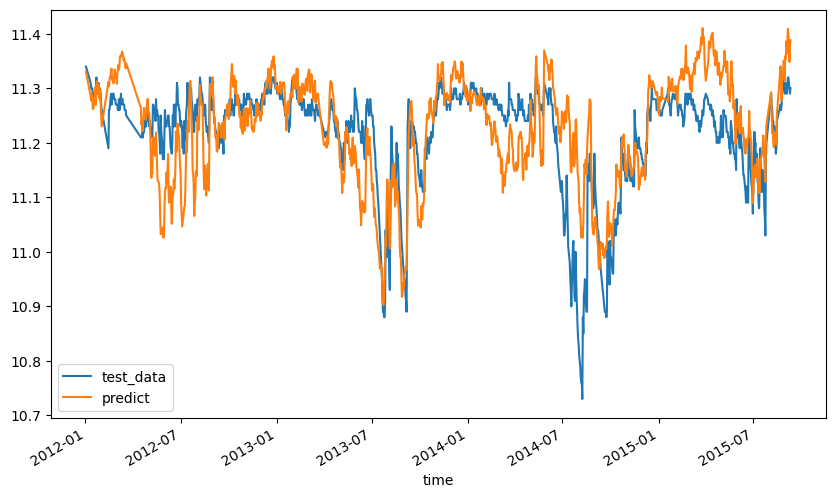

mean of test scores: 0.006350131309609236


In [102]:
# SVR
onehot_ftrs = ['year','day','dayofweek']
std_ftrs = [col for col in df_X.columns if col not in onehot_ftrs]
columnTransformer=ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
                                                  ('std', StandardScaler(), std_ftrs)],remainder='passthrough')
ML_algorithm=SVR
parameter_grid = {'svr__gamma': [1e-2, 1e-1, 1e1, 1e2, 1e3],'svr__C': [1e-1, 1e0, 1e1]} 

MLpipe_KFold_RMSE(columnTransformer, ML_algorithm, parameter_grid)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.257432      0.012557         0.029408        0.006306   
1        0.404860      0.091114         0.044708        0.020372   
2        0.774634      0.127042         0.036605        0.011164   
3        0.770108      0.191054         0.076869        0.057019   
4        0.364718      0.094819         0.052463        0.021171   
5        0.407998      0.104234         0.049194        0.005715   
6        1.575897      0.824991         0.071702        0.041061   
7        2.950481      0.862174         0.054509        0.003827   
8        3.209175      1.128138         0.049558        0.002966   
9        0.535854      0.050506         0.053155        0.006903   
10       0.647862      0.093955         0.056846        0.003264   
11       2.268870      0.878967         0.052135        0.004301   
12       3.776146      1.609569         0.065631      

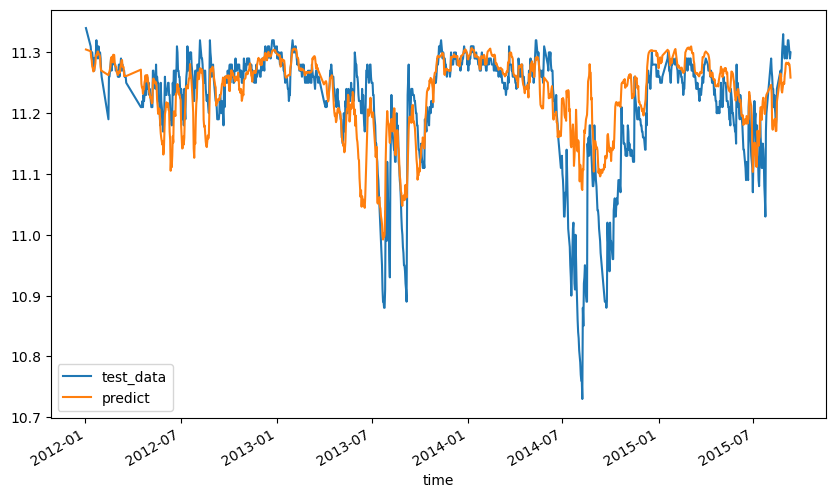

mean of test scores: 0.005117928245323834


In [103]:
# random forest
onehot_ftrs = ['year','day','dayofweek']
std_ftrs = [col for col in df_X.columns if col not in onehot_ftrs]
columnTransformer=ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
                                                  ('std', StandardScaler(), std_ftrs)],remainder='passthrough')
ML_algorithm=RandomForestRegressor
parameter_grid = {'randomforestregressor__max_depth': [1,5,10,30,50,100],'randomforestregressor__max_features': [0.01,0.25,0.5,0.75,1]} 

MLpipe_KFold_RMSE(columnTransformer, ML_algorithm, parameter_grid)

### Thoughts and to dos:
- SVR is very good at predicting the extreme parts of the curve, random forest is very good at predicting the 'normal' parts of the curve, can we find a way to combine them?
- should we experiment with different lag times?